<a href="https://colab.research.google.com/github/StanStarishko/python-programming-for-data/blob/main/Python/Heart%20Attack%20Risk%20Factors/Heart_Attack_Risk_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis Project of Heart Attack Risk Factors**


## **Project Overview**

### **Introduction**
In this project, I will analyse the key factors contributing to the risk of heart attack. Cardiovascular diseases, including heart attacks, remain one of the leading causes of death globally. According to the World Health Organization, over 17 million people die annually from heart-related conditions, making this a critical health issue.

The analysis of heart attack risk factors is crucial in understanding how these diseases develop and how they can be prevented. By examining factors such as age, cholesterol levels, blood pressure, and lifestyle habits, I aim to identify high-risk individuals. This project is essential for improving public health by enabling early intervention and targeted recommendations.

I will utilise data analysis techniques, such as logistic regression to model the probability of heart attacks and determine which factors have the strongest correlation. The results will support medical professionals in improving screening processes and inform public health strategies aimed at reducing the incidence of heart disease.

### **Project Goals**
1. **Dataset Understanding and Cleaning:**
   - Begin by examining the dataset's structure to ensure it is clean and free from missing values or outliers. This involves loading the data, checking for completeness, and preparing it for in-depth analysis.

2. **Exploratory Data Analysis (EDA):**
   - Exploring the dataset to identify patterns and correlations between key variables. This includes:
     - Generating correlation matrices to understand relationships between numerical variables.
     - Plotting distributions of key continuous variables to visualize their spread.
     - Creating boxplots to detect outliers and assess data spread.

3. **Categorical Data Analysis:**
   - Analyze the impact of categorical variables on heart attack risk:
     - Use bar charts to compare average values of key factors across different categories.
     - Create pie charts to visualize the distribution of categorical variables like gender and chest pain types.

4. **Advanced Visualizations and Insights:**
   - Apply line plots to explore trends and relationships between numerical variables, such as the relationship between age and cholesterol levels, and age and blood pressure.
   - Use pie charts to delve deeper into specific subsets of data, such as high cholesterol and high blood pressure groups, to understand the distribution of categorical variables within these groups.


# **Project Software Core**
I will use the DataStudio class I have set up, which includes methods for reading, cleaning, and visualising the dataset, as well as analysing relationships between variables.


In [ ]:
# Creating a block of necessary procedures and functions
# that we may need to perform reading and analysis of data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np


class DataStudio:

  ########################################################################
  # Block reading data from different sources
  ########################################################################
  class Reader:

    @staticmethod
    def is_valid_link(link="",link_name="",autotest=False):
      # link always isn't empty and must have is string
      return_value = link != "" and isinstance(link, str)

      if not return_value and not autotest: # not print if autotest
        print(f"{link_name} is not valid")

      return return_value


    # *********************************************
    @staticmethod
    def is_valid_df(df=None,name_df="",autotest=False):
      # check that "df" is Data Frame type
      if name_df == "" or not isinstance(name_df, str):
        name_df = "Yuor Data Frame"

      if not isinstance(df, pd.DataFrame) and not autotest: # not print if autotest
        print(f"{name_df} is not valid")
        return False

      return True


    # *********************************************
    # get data from Excel
    # *********************************************
    @staticmethod
    def get_excel_data(url="",sheet_name="default"):
      # url and sheet name always isn't empty and must have is string

      is_not_valid_url = not DataStudio.Reader.is_valid_link(url,"url")
      is_not_valid_sheet_name = not DataStudio.Reader.is_valid_link(sheet_name,"sheet name")

      if is_not_valid_url or is_not_valid_sheet_name:
        return False

      if sheet_name == "default":
        df = pd.read_excel(url)
      else:
        df = pd.read_excel(url,sheet_name)

      return df


    # *********************************************
    # get data from CVS
    # *********************************************
    @staticmethod
    def get_csv_data(url):

      if not DataStudio.Reader.is_valid_link(url,"url"):
        return False

      df = pd.read_csv(url)
      return df


  ########################################################################
  # Data Analysis, Preparation and Cleaning Block
  ########################################################################
  class Inspect:

    # *********************************************
    # Primary research
    # *********************************************
    @staticmethod
    def primary_research(df):
      if not DataStudio.Reader.is_valid_df(df,"df"):
        return False

      display(df.head())
      df.info()
      print("\nNull Values Summary:")
      print(df.isnull().sum())

      return True


    # *********************************************
    # Clean the data and/or repair Dataset
    # *********************************************
    @staticmethod
    def clean_data(df, threshold=50, only_cleaned=True, set_fillna=[]):
        if not DataStudio.Reader.is_valid_df(df, "df"):
            return False

        df_cleaned = df.copy()

        # If set_fillna is provided, replace NaNs based on column types
        if isinstance(set_fillna, dict):
          for fillna_params in set_fillna:
            bool_fill_value = set_fillna.get(fillna_params)
            df_cleaned[df_cleaned.select_dtypes(include=[fillna_params]).columns] = df_cleaned.select_dtypes(include=[fillna_params]).fillna(bool_fill_value)

        # Calculate the percentage of null values in each column
        null_percentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100

        # Drop columns with significant number of null values
        columns_to_drop = null_percentage[null_percentage > threshold].index
        df_cleaned_new = df_cleaned.drop(columns=columns_to_drop)

        if only_cleaned:
            return df_cleaned_new, 0  # Return only the cleaned DataFrame for save memory
        else:  # Return the cleaned DataFrame and the null percentage
            return df_cleaned_new, null_percentage


    # *********************************************
    # Remove outliers from the given column in the DataFrame.
    # *********************************************
    @staticmethod
    def remove_outliers(df, column):
        # Check if the column exists in the DataFrame
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            return False

        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Calculate upper and lower limits for outliers
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR

        # Filter out rows where the column values are within the limits
        df_normal = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

        return df_normal


  ########################################################################
  # Visualization block of analysis and statistics
  ########################################################################
  class Visualization:

    @staticmethod
    def creating_boxplot(df,box_name=""):

      # Check if the params is valid
      if not DataStudio.Reader.is_valid_df(df,"df") or not DataStudio.Reader.is_valid_link(box_name,"Box Name"):
        return False

      # Check if the data has been loaded and the required columns exist
      if not box_name in df.columns:
          print("Columns not found in the dataset!")
          return False

      # Create boxplot for Wellbeing
      plt.figure(figsize=(8, 6))
      sns.boxplot(data=df[box_name], color='skyblue')
      plt.title(f"Boxplot of {box_name}")
      plt.ylabel(f"{box_name}")
      plt.show()  # To separate the graphs
      print()

      return True


    # *********************************************
    # Line Plot with Average
    # *********************************************
    @staticmethod
    def line_plot(df_incom, x_column="", y_column="",with_average=False):
      if not DataStudio.Reader.is_valid_df(df_incom,"df") or not DataStudio.Reader.is_valid_link(x_column,"X Column") or not DataStudio.Reader.is_valid_link(y_column,"Y Column"):
        return False

      df_in = df_incom.copy()

      # Calculate average with a window size of 3
      name_title = f"{y_column} Line Plot"
      if with_average:
        name_average = f"{y_column}_avrg"
        df_in[name_average] = df_in[y_column].rolling(window=3).mean()
        name_title += " with Moving Average"


      plt.figure(figsize=(10, 6))
      sns.lineplot(x=x_column, y=y_column, data=df_in, marker='o', label=y_column, color='blue')
      if with_average:
        sns.lineplot(x=x_column, y=name_average, data=df_in, label=f'{y_column} Average', color='red', linestyle='--')

      plt.xlabel(x_column, fontsize=12)
      plt.ylabel(y_column, fontsize=12)
      plt.title(name_title, fontsize=14)
      plt.legend()
      plt.grid(True)

      plt.show()
      print()

      return True


    # *********************************************
    # plotting as a vertical bar chart
    # *********************************************
    @staticmethod
    def vertical_bar_chart(df_in, x_column="", y_column="",x_name="",y_name=""):

      if not DataStudio.Reader.is_valid_df(df_in,"df") or not DataStudio.Reader.is_valid_link(x_column,"X Column") or not DataStudio.Reader.is_valid_link(y_column,"Y Column"):
        return False

      plt.figure(figsize=(12, 8))
      sns.barplot(x=x_column, y=y_column, data=df_in, errorbar=None, estimator=np.mean)
      plt.title(f'Average {y_name} by {x_name}')
      plt.xlabel(x_name)
      plt.ylabel(f'Average {y_name}')
      plt.xticks(rotation=45)
      plt.show()
      print()

      return True


    # *********************************************
    # Histogram plot distribution with KDE Line
    # *********************************************
    @staticmethod
    def plot_distribution(df, column):
        if not DataStudio.Reader.is_valid_df(df, "df") or not DataStudio.Reader.is_valid_link(column, "column"):
            return

        plt.figure(figsize=(12, 8))
        sns.histplot(df[column], kde=True, bins=30)  # Use histplot with kde for a smooth distribution curve
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        print()

        return True


    # *********************************************
    # Compare mean and median
    # *********************************************
    @staticmethod
    def print_mean_median(df, column):
        if not DataStudio.Reader.is_valid_df(df, "df") or not DataStudio.Reader.is_valid_link(column, "column"):
            return

        mean_value = df[column].mean()
        median_value = df[column].median()

        print(f"Mean of {column}: {mean_value}")
        print(f"Median of {column}: {median_value}")
        print(f"Mean and Median are {'similar' if abs(mean_value - median_value) < 1e-5 else 'not similar'}\n")

        return True


    # *********************************************
    # Calculate the correlation matrix
    # *********************************************
    @staticmethod
    def create_correlation_heatmap(df):
        if not DataStudio.Reader.is_valid_df(df, "df"):
            return


        # Filter to keep only numeric columns
        df_numeric = df.select_dtypes(include=['number'])

        if df_numeric.empty:
            print("No numeric columns found in the DataFrame.")
            return False

        # Calculate correlation matrix
        correlation_matrix = df_numeric.corr().round(2)

        # Create a heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Heatmap')
        plt.show()
        print()

        return correlation_matrix


    # *********************************************
    # linear regression
    # *********************************************
    @staticmethod
    def linear_regression(df,name_x="",name_y="",not_display=False):

      if not DataStudio.Reader.is_valid_df(df) or not DataStudio.Reader.is_valid_link(name_x,"Data X") or not DataStudio.Reader.is_valid_link(name_y,"Data Y"):
        return False

      # Extract the 'Age' and 'Income' columns
      data_x = df[name_x]
      data_y = df[name_y]

      # Run the linear regression
      regression = linregress(data_x, data_y)
      if not_display:
        return regression

      # Display the regression result
      print(regression)

      # Display the slope, intercept, and rvalue
      print(f"Slope: {regression.slope}")
      print(f"Intercept: {regression.intercept}")
      print(f"R-value (Correlation Coefficient): {regression.rvalue}")
      print(f"P-value: {regression.pvalue}")
      print(f"Standard Error: {regression.stderr}")
      print(f"Y-intercept: {regression.intercept}")
      print(f"R-squared: {regression.rvalue ** 2}")
      print()

      return regression


    # *********************************************
    # Scatter Plot with Line of Best Fit
    # *********************************************
    @staticmethod
    def plot_line_of_best_fit(df,name_x="",name_y=""):
      if not DataStudio.Reader.is_valid_df(df) or not DataStudio.Reader.is_valid_link(name_x,"Data X") or not DataStudio.Reader.is_valid_link(name_y,"Data Y"):
        return False

      plt.figure(figsize=(10, 6))
      sns.regplot(x=name_x,
                  y=name_y,
                  data=df,
                  scatter_kws={'color': 'purple'},
                  line_kws={'color': 'olive', 'linewidth': 1}
                  )
      plt.xlabel(name_x)
      plt.ylabel(name_y)
      plt.title(f'Scatter Plot with Line of Best Fit for {name_x} vs {name_y}')
      plt.show()
      print()

      return True


    # *********************************************
    # Creating Boxplot
    # *********************************************
    @staticmethod
    def creating_boxplot(df,box_name=""):

      # Check if the params is valid
      if not DataStudio.Reader.is_valid_df(df,"df") or not DataStudio.Reader.is_valid_link(box_name,"Box Name"):
        return False

      # Check if the data has been loaded and the required columns exist
      if not box_name in df.columns:
          print("Columns not found in the dataset!")
          return False

      # Create boxplot for Wellbeing
      plt.figure(figsize=(8, 6))
      sns.boxplot(data=df[box_name], color='skyblue')
      plt.title(f"Boxplot of {box_name}")
      plt.ylabel(f"{box_name}")
      plt.show()  # To separate the graphs
      print()

      return True


    # *********************************************
    #Creating a pie chart
    # *********************************************
    @staticmethod
    def show_piechart(df,name_group_col="",name_data_col="",kind_group="mean"):

      if not DataStudio.Reader.is_valid_df(df,"df") or not DataStudio.Reader.is_valid_link(name_group_col,"Group Column") or not DataStudio.Reader.is_valid_link(name_data_col,"Data Column"):
        return False

      # Grouping dataset
      if kind_group == "sum":
        group_data = df.groupby(name_group_col)[name_data_col].sum()
      elif kind_group == "min":
        group_data = df.groupby(name_group_col)[name_data_col].min()
      elif kind_group == "max":
        group_data = df.groupby(name_group_col)[name_data_col].max()
      else: # default mode
        group_data = df.groupby(name_group_col)[name_data_col].mean()

      # Create labela
      labels = group_data.index

      # Set the colour palette
      colors = sns.color_palette('muted')

      # Creating a pie chart
      plt.figure(figsize=(12, 8))
      plt.pie(group_data,
              labels=labels,
              labeldistance=1.1,
              pctdistance=0.97,
              colors=colors,
              autopct='%1.1f%%',
              startangle=140
              )
      plt.title(f'{name_data_col} Levels by {name_group_col} ({kind_group})')
      plt.show()
      print()

      return True


## **Link to Dataset:**
https://raw.githubusercontent.com/StanStarishko/Portfolio/main/Python/Heart%20Attack%20Risk%20Factors/heart_attack_dataset.csv

# **Project Plan**

Here’s the project plan for analysing the Heart Attack Risk Factors dataset, which will involve data cleaning, exploratory data analysis (EDA), visualisation, and advanced statistical analysis.


## 1. **Dataset Overview and Initial Exploration**
   **Objective:** Understand the dataset structure and identify any potential issues with missing data or outliers.
   
   - **Primary Research:** I will begin by loading the dataset and inspecting its structure using the `primary_research()` method. This will display the first few rows and provide a summary of the dataset, including data types and any missing values.
   
     _Goal:_ This will help me identify which columns are important and whether there are any immediate data quality concerns, such as null values or inappropriate data types.

In [ ]:
# defining Data Processing Methods
dsr = DataStudio.Reader
dsi = DataStudio.Inspect
dsv = DataStudio.Visualization

# defining main dataset
url = "https://raw.githubusercontent.com/StanStarishko/Portfolio/main/Python/Heart%20Attack%20Risk%20Factors/heart_attack_dataset.csv"
df = dsr.get_csv_data(url)
dsi.primary_research(df)

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Null Values Summary:
Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
Treatment                0
dtype: int64


True

### **Dataset Overview and Initial Exploration - Findings**

1. **Dataset Structure:**
   The dataset consists of **1,000 entries** with **8 columns**. These columns include both **numerical** and **categorical** variables, specifically:
   - **Numerical columns:** `Age`, `Blood Pressure (mmHg)`, `Cholesterol (mg/dL)`
   - **Categorical columns:** `Gender`, `Has Diabetes`, `Smoking Status`, `Chest Pain Type`, `Treatment`

2. **Null Values:**
   No missing data was identified. Every column has a complete set of entries, as shown by the null values summary, which reported 0 missing values for all columns.

3. **Data Types:**
   - **Numerical data** is correctly identified as `int64`.
   - **Categorical data** is appropriately marked as `object` type, but might need further transformation (e.g., encoding) for future analysis, especially for machine learning tasks.

### Insights:
- No immediate data quality concerns related to missing values.
- The dataset is ready for further exploration and analysis. However, I will need to investigate **outliers** and ensure that **categorical variables** are prepared correctly for analysis.

---


## 2. **Data Cleaning and Preparation**
   **Objective:** Ensure that the dataset is clean and ready for analysis by addressing missing values and removing outliers.
   
   - **Handling Missing Data:** Using the `clean_data()` method, I will handle missing data by either filling in appropriate values or dropping columns with a high percentage of missing values.
     - I will set a threshold of 50% for missing values; columns exceeding this threshold will be dropped.
     - For the remaining columns, I will decide whether to fill missing values using the median or mode depending on the data type.
     - Based on the initial research, I saw that the data is "clean". But to check whether the conclusions are correct, I will run the data cleaning mechanism.

     _Goal:_ This will prepare the dataset for reliable analysis by removing any potential noise from missing values.
   
   - **Outlier Removal:** I will use the `remove_outliers()` method to eliminate outliers from key columns, particularly numerical variables such as age, cholesterol levels, and blood pressure.
   
     _Goal:_ By removing outliers, I can ensure that the analysis focuses on the general population without skewed results from extreme values.


In [ ]:
# Handling missing data using the clean_data() method
# Since our initial research shows no missing values, this step will act as a validation
df_cleaned, null_percentage = dsi.clean_data(df, threshold=50, only_cleaned=False)

# Display the percentage of missing data in each column after cleaning (for validation purposes)
print("Percentage of missing values in each column after cleaning:")
print(null_percentage)

# Outlier removal for numerical columns 'Age', 'Cholesterol (mg/dL)', and 'Blood Pressure (mmHg)'
# We'll apply the remove_outliers() function to each of these numerical columns
df_no_outliers_age = dsi.remove_outliers(df_cleaned, 'Age')
df_no_outliers_chol = dsi.remove_outliers(df_no_outliers_age, 'Cholesterol (mg/dL)')
df_no_outliers_bp = dsi.remove_outliers(df_no_outliers_chol, 'Blood Pressure (mmHg)')

# Final cleaned dataset after outlier removal
df_final_cleaned = df_no_outliers_bp

# Display the first few rows of the cleaned dataset for confirmation
print("Cleaned dataset after outlier removal:")
display(df_final_cleaned.head())

# Checking the shape of the dataset to ensure that rows with outliers have been removed
print(f"\nShape of dataset before cleaning: {df.shape}")
print(f"Shape of dataset after cleaning and outlier removal: {df_final_cleaned.shape}")


Percentage of missing values in each column after cleaning:
Gender                   0.0
Age                      0.0
Blood Pressure (mmHg)    0.0
Cholesterol (mg/dL)      0.0
Has Diabetes             0.0
Smoking Status           0.0
Chest Pain Type          0.0
Treatment                0.0
dtype: float64
Cleaned dataset after outlier removal:


,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication



Shape of dataset before cleaning: (1000, 8)
Shape of dataset after cleaning and outlier removal: (1000, 8)


**Conclusion**

1. **No Missing Data:**
   After performing data cleaning, it was confirmed that the dataset contains **no missing values**. All columns are complete with no empty cells, ensuring data integrity for further analysis. Specifically, all 8 columns have 0% missing values.

2. **Outlier Removal:**
   An outlier removal process was applied to key numerical variables: `Age`, `Cholesterol (mg/dL)`, and `Blood Pressure (mmHg)`. However, after examining the dataset's shape, it was found that the number of rows **remained unchanged** — 1000 rows before and after the cleaning process. This indicates that either **no outliers were present**, or they were not deemed extreme enough to be removed.

3. **Final Dataset:**
   Following the cleaning and outlier removal steps, it was confirmed that the **data are clean and ready for further analysis**. This cleaned dataset will serve as the base for all upcoming research phases, including correlation analysis, model building, and identification of key risk factors.

Thus, all further analyses and predictions will be based on the **original dataset** containing all 1000 observations and 8 variables.

---


## 3. **Descriptive Statistics**
   **Objective:** Obtain a summary of the key statistics of the dataset to understand central tendencies and variability.
   
   - **Mean and Median Comparison:** Using `print_mean_median()` for key continuous variables (e.g., age, cholesterol, resting blood pressure), I will calculate and compare the mean and median to assess the distribution of the data.
   
     _Goal:_ This will help me understand whether the variables are normally distributed or skewed, which will inform the choice of statistical tests later in the analysis.


In [ ]:
# Define a list of continuous variables to analyze
numerical_columns = df.select_dtypes(include=['number']).columns

# Print mean and median for each continuous variable
for column in numerical_columns:
  print(f"Mean and Median for {column}:")
  dsv.print_mean_median(df, column)
  print()


Mean and Median for Age:
Mean of Age: 60.338
Median of Age: 60.5
Mean and Median are not similar


Mean and Median for Blood Pressure (mmHg):
Mean of Blood Pressure (mmHg): 145.44
Median of Blood Pressure (mmHg): 146.0
Mean and Median are not similar


Mean and Median for Cholesterol (mg/dL):
Mean of Cholesterol (mg/dL): 223.789
Median of Cholesterol (mg/dL): 225.5
Mean and Median are not similar




### Summary of Key Continuous Variables

#### **Age:**
- **Mean:** 60.338
- **Median:** 60.5
- **Observation:** The mean and median are not similar. This indicates that the age distribution is likely skewed. The mean being slightly lower than the median suggests a right-skewed distribution where a few older ages may be pulling the mean higher.

#### **Blood Pressure (mmHg):**
- **Mean:** 145.44
- **Median:** 146.0
- **Observation:** The mean and median are not similar. This suggests that the blood pressure distribution might also be skewed. Similar to age, the mean being slightly lower than the median indicates a right-skewed distribution with some higher blood pressure values affecting the mean.

#### **Cholesterol (mg/dL):**
- **Mean:** 223.789
- **Median:** 225.5
- **Observation:** The mean and median are not similar. This suggests a skewed distribution of cholesterol levels. The mean is lower than the median, indicating a right-skewed distribution with some higher cholesterol values affecting the mean.

### Conclusion:
The non-similarity between the mean and median across all key continuous variables suggests that the data is right-skewed. This skewness could affect the normality assumptions for subsequent analyses and statistical tests.

---

### 4. **Descriptive Statistics and Summary Analysis**


#### 4.1 **Standard descriptive statistics**

- **Objective:** Further statistical exploration by calculating key statistics such as mean, median, standard deviation, and count for numerical columns like `Age`, `Cholesterol (mg/dL)`, and `Blood Pressure (mmHg)`.

- **Method(s):**
  - `describe()` Pandas method to generate summary statistics.
  - It helps focus on identifying trends, such as the average age, average cholesterol level, and distribution of blood pressure.
  
- **Goal:** To establish a better understanding of the dataset's central tendencies and variance, and potentially detect further areas for exploration.


In [ ]:
# Generate summary statistics using pandas describe() function for numerical columns
summary_stats = df.describe()

# Display the summary statistics
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
                Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)
count  1000.000000            1000.000000          1000.000000
mean     60.338000             145.440000           223.789000
std      17.317496              31.756525            42.787817
min      30.000000              90.000000           150.000000
25%      45.000000             118.000000           185.000000
50%      60.500000             146.000000           225.500000
75%      76.000000             173.000000           259.000000
max      89.000000             199.000000           299.000000


##### Summary Statistics of Key Continuous Variables

###### **Age:**
- **Count:** 1000
- **Mean:** 60.34
- **Standard Deviation:** 17.32
- **Minimum:** 30
- **25th Percentile (Q1):** 45
- **Median (50th Percentile):** 60.5
- **75th Percentile (Q3):** 76
- **Maximum:** 89

**Observation:**
- The age distribution has a mean of 60.34 with a standard deviation of 17.32, indicating moderate variability.
- The age range spans from 30 to 89 years.
- The median (60.5) is close to the mean, but still slightly higher, suggesting a mild right skewness. The quartiles (Q1 = 45, Q3 = 76) indicate that 50% of the data falls between these values, showing a wide range of ages.

###### **Blood Pressure (mmHg):**
- **Count:** 1000
- **Mean:** 145.44
- **Standard Deviation:** 31.76
- **Minimum:** 90
- **25th Percentile (Q1):** 118
- **Median (50th Percentile):** 146
- **75th Percentile (Q3):** 173
- **Maximum:** 199

**Observation:**
- The mean blood pressure is 145.44 with a standard deviation of 31.76, reflecting significant variability in blood pressure measurements.
- The blood pressure ranges from 90 to 199 mmHg.
- The median (146) is close to the mean, but there is a substantial range between Q1 (118) and Q3 (173), indicating a broad spread and potential skewness towards higher values.

###### **Cholesterol (mg/dL):**
- **Count:** 1000
- **Mean:** 223.79
- **Standard Deviation:** 42.79
- **Minimum:** 150
- **25th Percentile (Q1):** 185
- **Median (50th Percentile):** 225.5
- **75th Percentile (Q3):** 259
- **Maximum:** 299

**Observation:**
- The mean cholesterol level is 223.79 with a standard deviation of 42.79, showing considerable variability in cholesterol levels.
- Cholesterol levels range from 150 to 299 mg/dL.
- The median (225.5) is higher than the mean, suggesting a right-skewed distribution where higher cholesterol values influence the mean. The quartiles (Q1 = 185, Q3 = 259) highlight a substantial spread in cholesterol levels.

##### Conclusion:
The summary statistics reveal the central tendencies, variability, and distribution range for age, blood pressure, and cholesterol. The data exhibits a broad spread and some skewness in key variables, with mean values influenced by higher extremes.

---

#### 4.2 **Detailed Data Breakdown and Diagnostics**

In addition to standard descriptive statistics, it is important to further explore the dataset to ensure there are no significant biases or data inconsistencies. By examining the unique values and their distribution across categorical variables, I can identify whether the dataset is well-balanced. For example, ensuring an even representation of gender or age groups can improve the reliability of any predictive models developed later.

For this analysis, I will:
- Extract and print the column names, data types, and number of rows to ensure the structure of the dataset is consistent with expectations.
- Analyse unique values in categorical columns, such as gender, to check for potential imbalances.
- Review summary statistics for numerical columns to better understand the distribution of continuous variables.
- Identify any missing data, as missing values can lead to incorrect model predictions if not properly handled.

This deeper data breakdown allows for a more comprehensive understanding of the dataset, which will support more informed decisions during the model development phase.


In [ ]:
# Function for general data information
def get_data_overview(df):
    """
    Prints basic information about the dataframe: column names,
    number of rows, and data types for each column.
    """
    print("Column Names: ", df.columns.tolist())
    print(f"Number of Rows: {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}")
    print("\nData Types:\n", df.dtypes)

# Function for analysing unique values in each column
def get_unique_values(df):
    """
    Prints unique values and their counts for categorical columns.
    """
    for column in df.select_dtypes(include=['object', 'category']).columns:
        print(f"\nUnique values in '{column}':")
        print(df[column].value_counts())

# Function for general information about numerical data
def get_numeric_summary(df):
    """
    Prints summary statistics for numerical columns.
    """
    print("\nSummary statistics for numerical columns:")
    print(df.describe())

# Function for checking badges
def check_missing_data(df):
    """
    Prints the number of missing values in each column.
    """
    missing_data = df.isnull().sum()
    print("\nMissing data in each column:")
    print(missing_data[missing_data > 0])

# Function for running all checks and outputting the results
def run_data_diagnostics(df):
    """
    Runs all diagnostic functions on the dataframe to get a complete overview.
    """
    get_data_overview(df)
    get_unique_values(df)
    get_numeric_summary(df)
    check_missing_data(df)


In [ ]:
run_data_diagnostics(df)

Column Names:  ['Gender', 'Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)', 'Has Diabetes', 'Smoking Status', 'Chest Pain Type', 'Treatment']
Number of Rows: 1000
Number of Columns: 8

Data Types:
 Gender                   object
Age                       int64
Blood Pressure (mmHg)     int64
Cholesterol (mg/dL)       int64
Has Diabetes             object
Smoking Status           object
Chest Pain Type          object
Treatment                object
dtype: object

Unique values in 'Gender':
Gender
Female    510
Male      490
Name: count, dtype: int64

Unique values in 'Has Diabetes':
Has Diabetes
Yes    517
No     483
Name: count, dtype: int64

Unique values in 'Smoking Status':
Smoking Status
Never      352
Current    325
Former     323
Name: count, dtype: int64

Unique values in 'Chest Pain Type':
Chest Pain Type
Non-anginal Pain    261
Asymptomatic        255
Typical Angina      243
Atypical Angina     241
Name: count, dtype: int64

Unique values in 'Treatment':
Treatment
Lifes

##### **Analysis of Data and Evaluation of Sample Size**

###### 1. **Evaluation of Data Size and Its Implications**

- **Current Sample Size:** The dataset consists of 1,000 records. This sample size is generally sufficient for preliminary insights and exploratory analysis. However, a larger sample, such as 100,000 records, would provide several advantages:

  - **Increased Precision:** A larger sample would reduce the margin of error and improve the reliability of statistical estimates.
  - **Enhanced Patterns Identification:** With more data, subtle patterns and correlations that might be missed in a smaller sample could become more evident.
  - **Robustness:** Larger datasets tend to provide a clearer picture and are less affected by anomalies or outliers, thus yielding more stable and generalisable results.

  **Conclusion:** Expanding the dataset would enhance the overall quality and reliability of the analysis.

###### 2. **Data Balance**

- **Gender Distribution:** The dataset is nearly balanced between females (510) and males (490). This balance is favourable as it allows for an equitable analysis of gender-based differences.

- **Age Distribution:** The age range spans from 30 to 89 years, with a mean age of 60.3 years. This broad range is beneficial for understanding how age impacts various factors within the dataset.

- **Diabetes Status:** The distribution between individuals with diabetes (517) and those without (483) is balanced, which is advantageous for comparing the impact of diabetes on treatment choices.

- **Smoking Status:** The dataset shows a nearly equal distribution among smoking statuses (Never: 352, Current: 325, Former: 323). This balance is useful for assessing the influence of smoking on health outcomes and treatment options.

- **Chest Pain Type:** The distribution is evenly spread across the different types of chest pain, which allows for a comprehensive analysis of how each type correlates with other variables.

- **Treatment Types:** The treatments are fairly evenly distributed (Lifestyle Changes: 269, CABG: 252, Angioplasty: 247, Medication: 232). This balance supports a fair comparison of treatment outcomes and factors influencing treatment decisions.

  **Conclusion:** The current balance of the dataset is suitable for initial analyses. However, any identified imbalances in specific segments should be addressed through appropriate data adjustment techniques.

###### 3. **Unique Values and Distributions**

- The dataset includes a comprehensive set of unique values across different columns. Assessing these values are helping in understanding the variety and distribution of data points.

- By examining the balance of unique items within each category, we can ensure that no single category disproportionately affects the analysis. This step is crucial for validating the representativeness of the data.

  **Conclusion:** Continue to monitor and validate the balance of unique values as additional data is incorporated or analysed further.

###### **Completion**

The dataset, as currently structured, provides a solid foundation for analysis. It is reasonably balanced and sufficient for initial insights, increasing the sample size would enhance the precision and robustness of the findings. Continued monitoring and adjustment of data balance will further support accurate and reliable analyses.

---



## 5. **Exploratory Data Analysis (EDA)**
   **Objective:** Identify patterns, correlations, and trends within the dataset.
   
   - **Correlation Matrix:** I will use the `create_correlation_heatmap()` method to calculate and visualise the correlation between all numerical variables. This will highlight relationships between variables such as age, cholesterol, and heart disease.
   
     _Goal:_ Understanding correlations will allow me to identify which factors may have the strongest influence on heart attack risk.

   - **Distribution of Key Variables:** I will plot histograms using the `plot_distribution()` method to visualise the distribution of key variables such as age, cholesterol, and maximum heart rate achieved.
   
     _Goal:_ This will show how these factors vary across the dataset and indicate whether transformations are needed for certain variables.

   - **Boxplots for Visualising Distribution:** I will generate boxplots for numerical variables (such as cholesterol and age) using `creating_boxplot()` to assess the spread and identify any outliers.


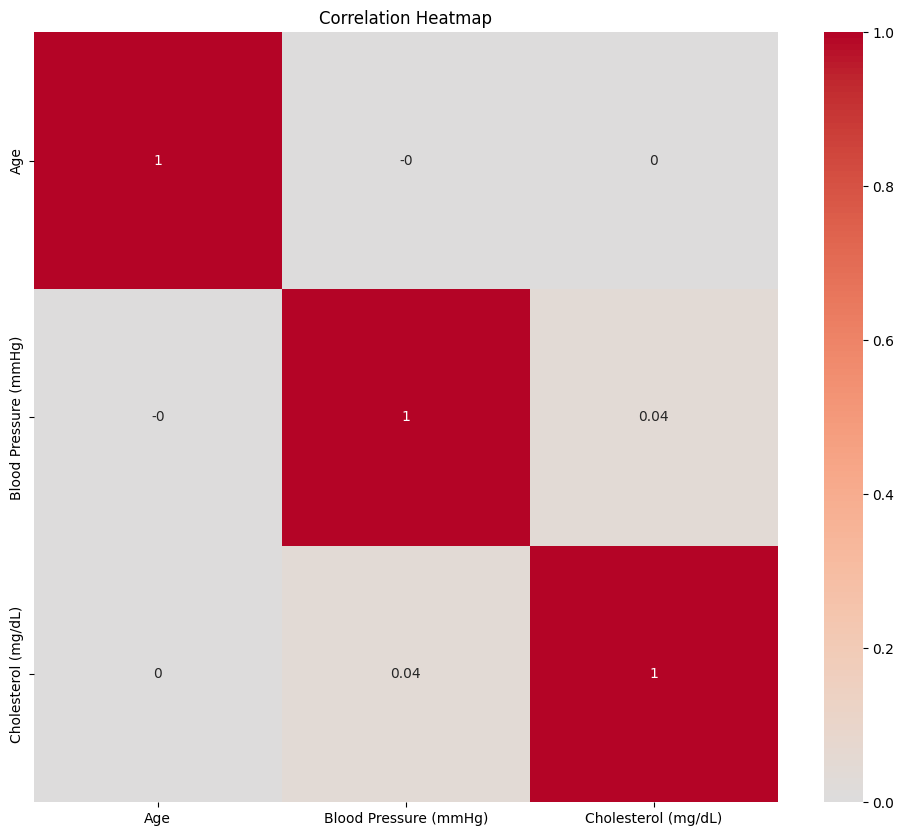

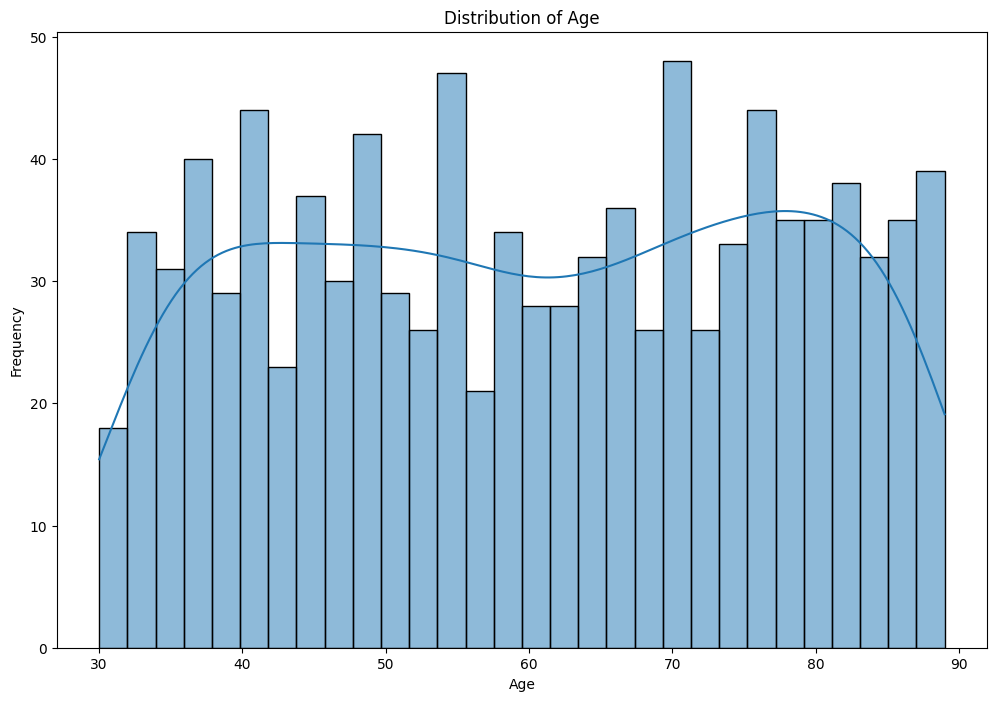

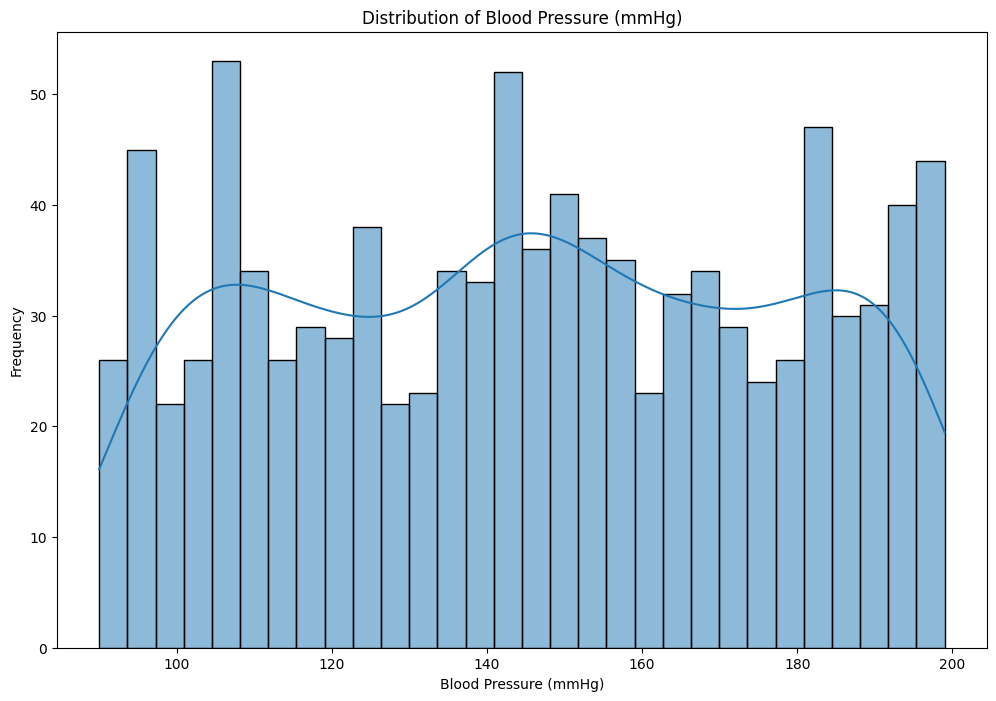

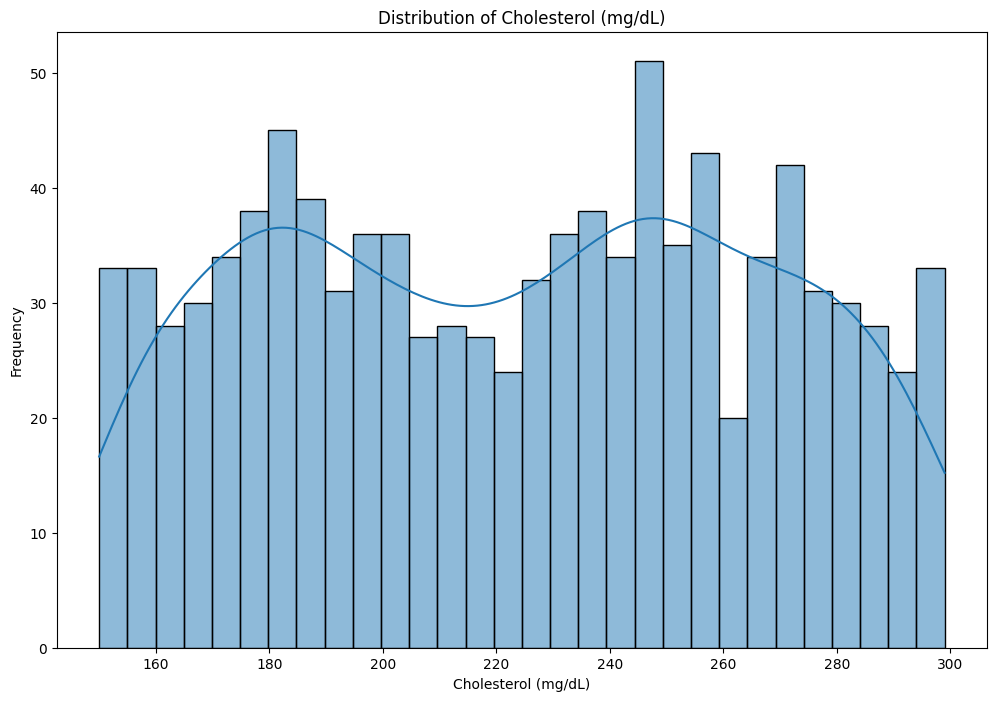

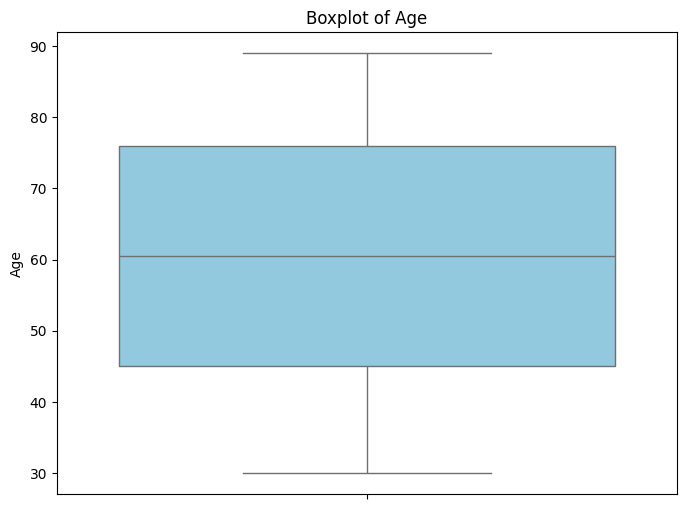

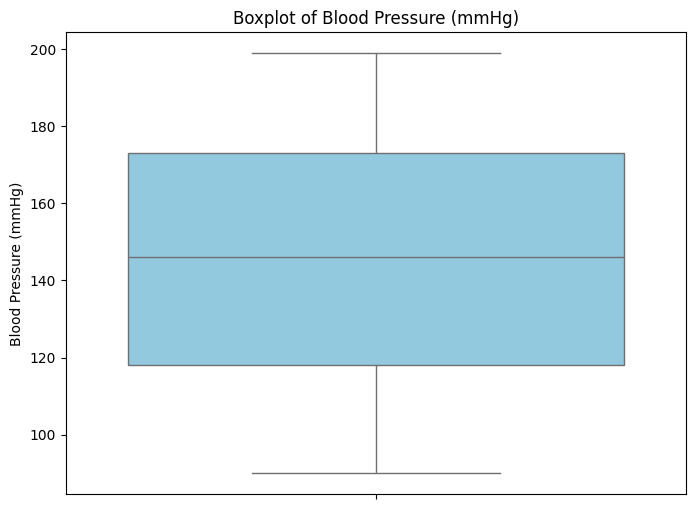

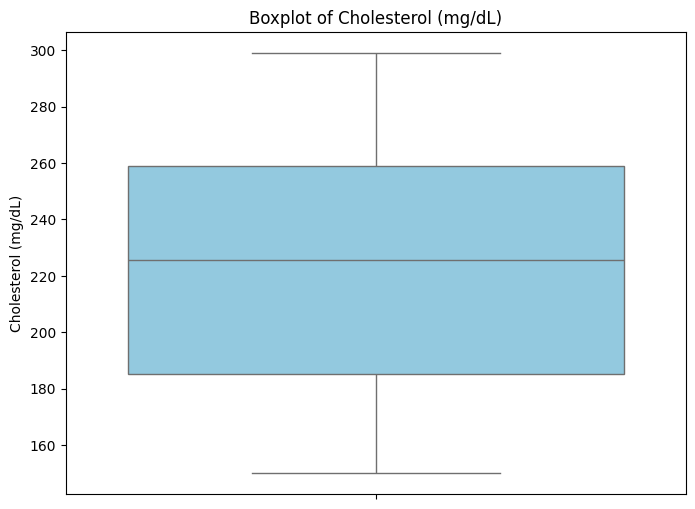

In [ ]:
# Correlation Matrix for Numerical Variables
dsv.create_correlation_heatmap(df)

# Plotting histograms for each variable
for col in numerical_columns:
    dsv.plot_distribution(df, column=col)

# Boxplot for Age, Blood Pressure, and Cholesterol
for col in numerical_columns:
    dsv.creating_boxplot(df, box_name=col)



1. **Correlation Matrix:** The method `create_correlation_heatmap()` visualizes the correlations between all numerical variables in the dataset, which helps identify relationships (positive or negative) between factors like `Age`, `Blood Pressure`, and `Cholesterol`.

2. **Distribution of Key Variables:** The `plot_distribution()` method generates histograms to examine the distribution of key numerical variables. This helps us assess whether the data is normally distributed or skewed.

3. **Boxplots for Distribution:** The `creating_boxplot()` method displays boxplots, which provide a summary of the distribution of the data, highlight the quartiles, and show any outliers.

---


## 6. **Categorical Data Analysis**
   **Objective:** Investigate the impact of categorical variables, such as gender and chest pain type, on the risk of heart attacks.
   
   - **Bar Charts for Categorical Data:** Using the `vertical_bar_chart()` method, I will compare the average values of cholesterol, age, and maximum heart rate achieved across different chest pain types and genders.
   
     _Goal:_ This will allow me to see if specific categories (e.g., certain chest pain types or gender) are associated with higher or lower risk factors for heart attacks.

   - **Pie Charts:** I will visualise categorical data (e.g., distribution of gender and chest pain type) with `show_piechart()` to better understand the demographic composition of the dataset.


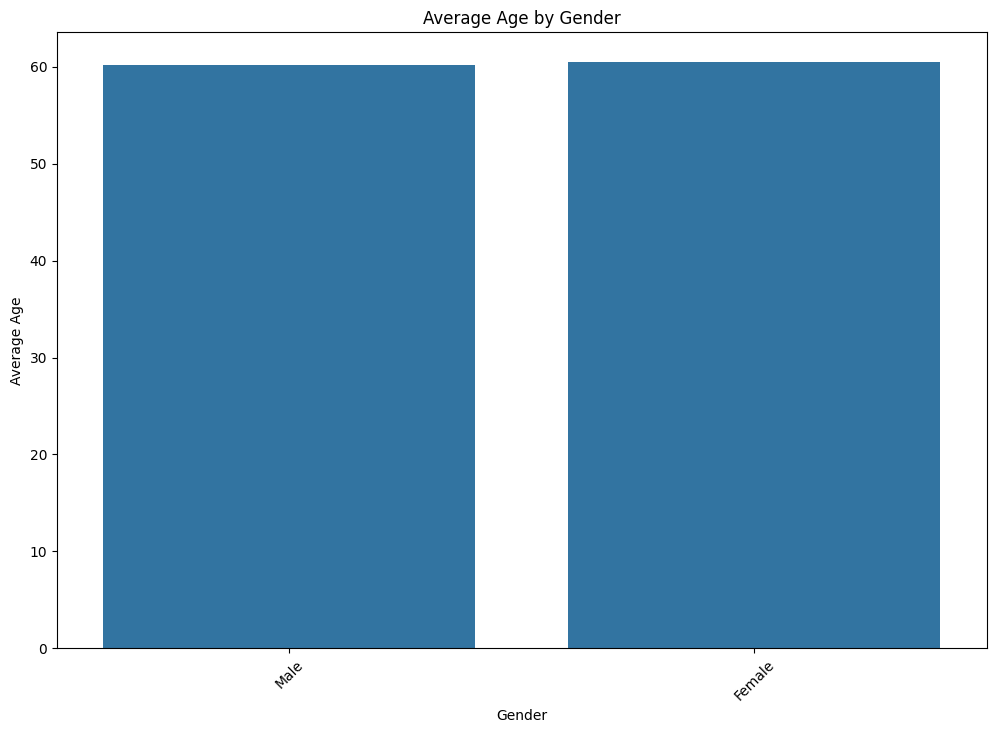

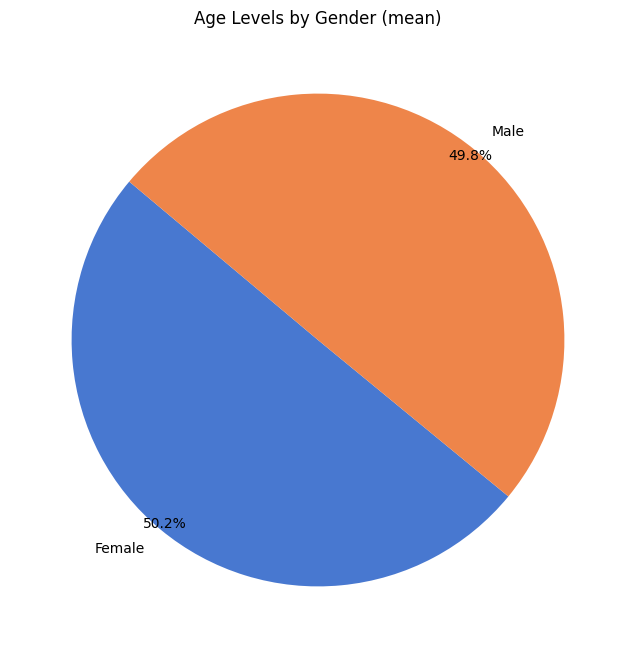

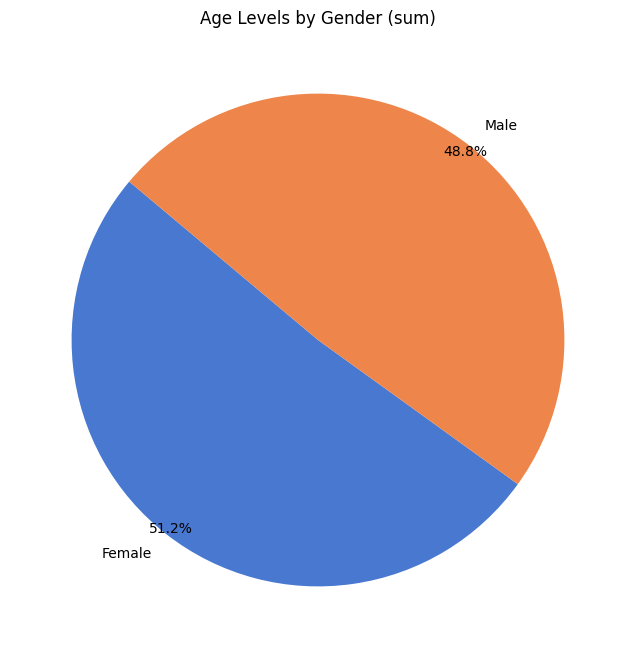

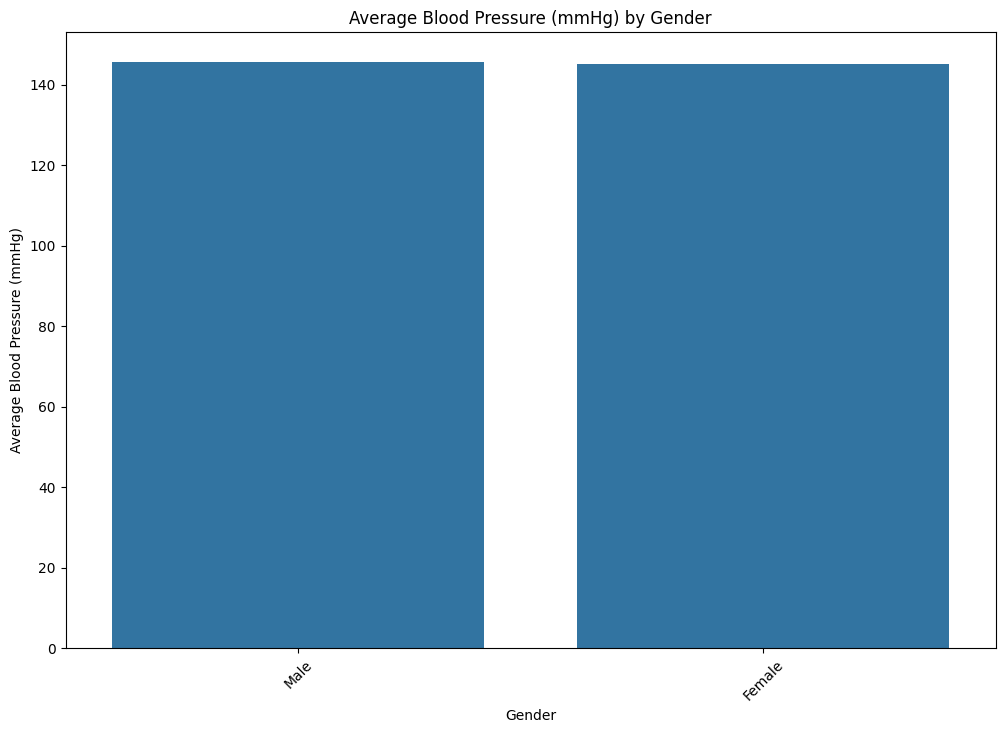

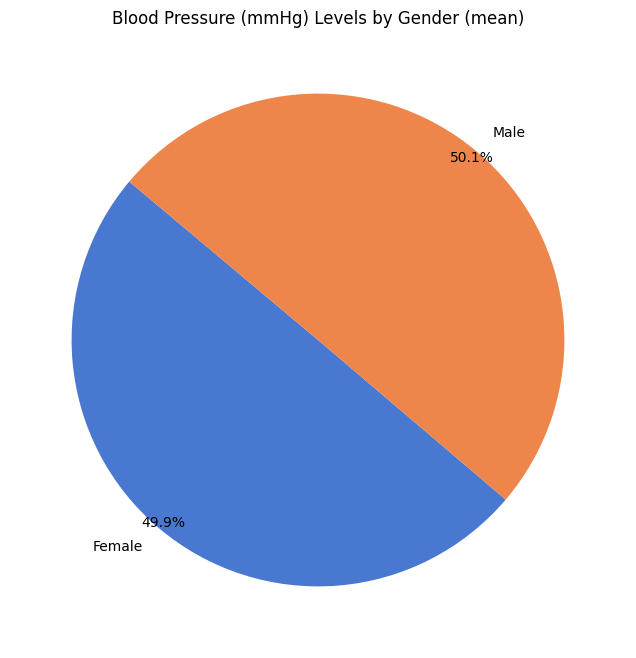

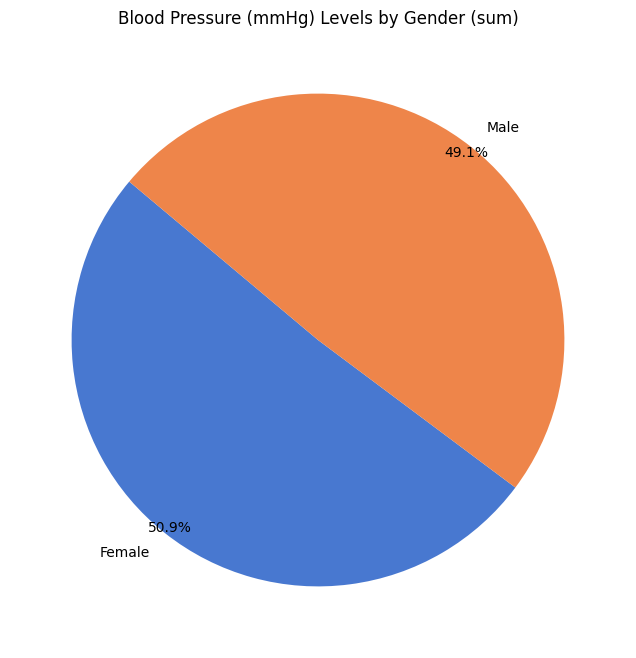

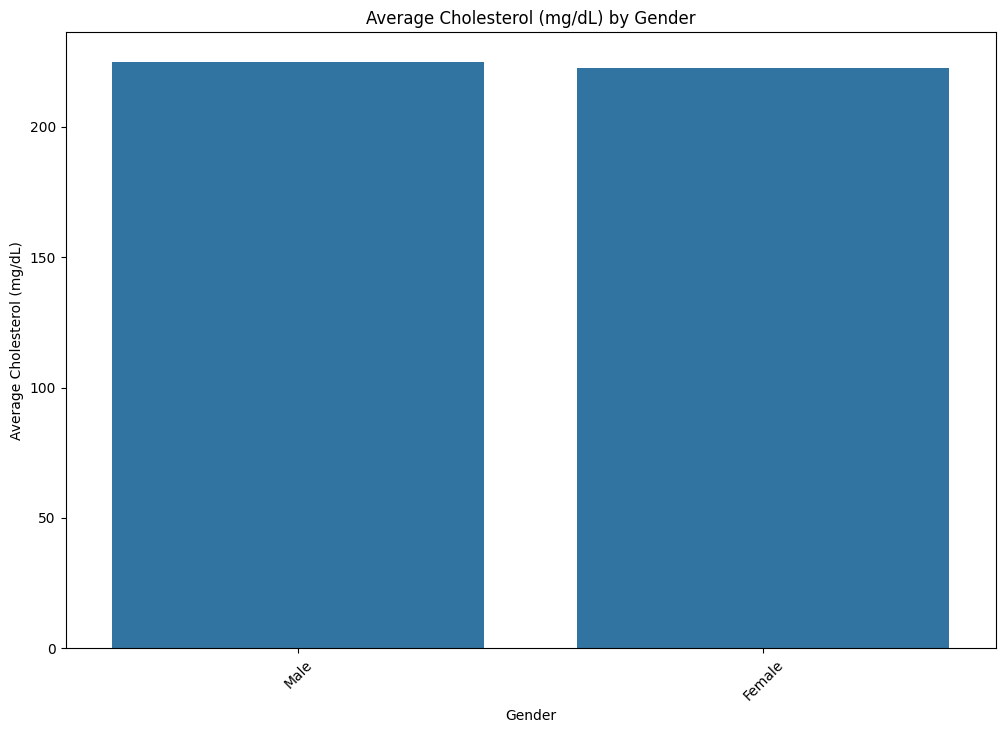

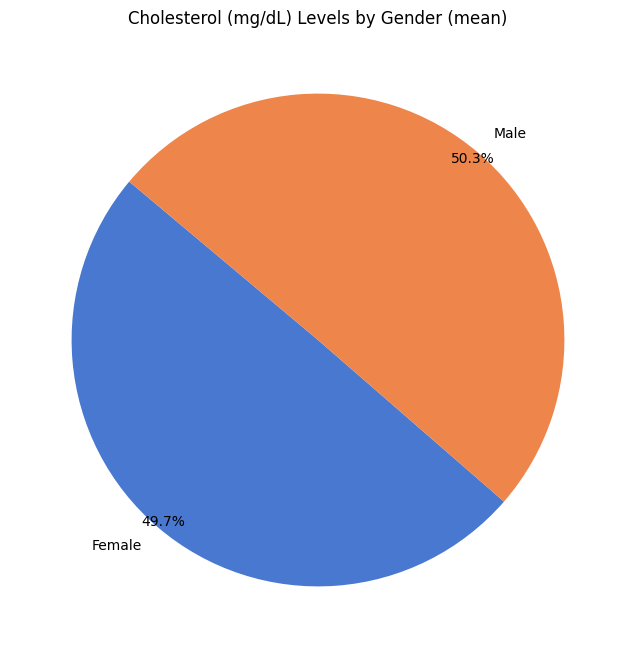

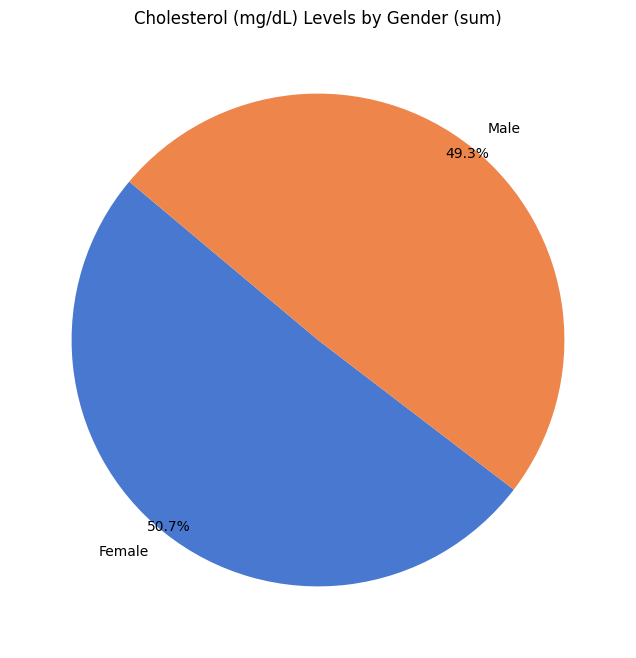

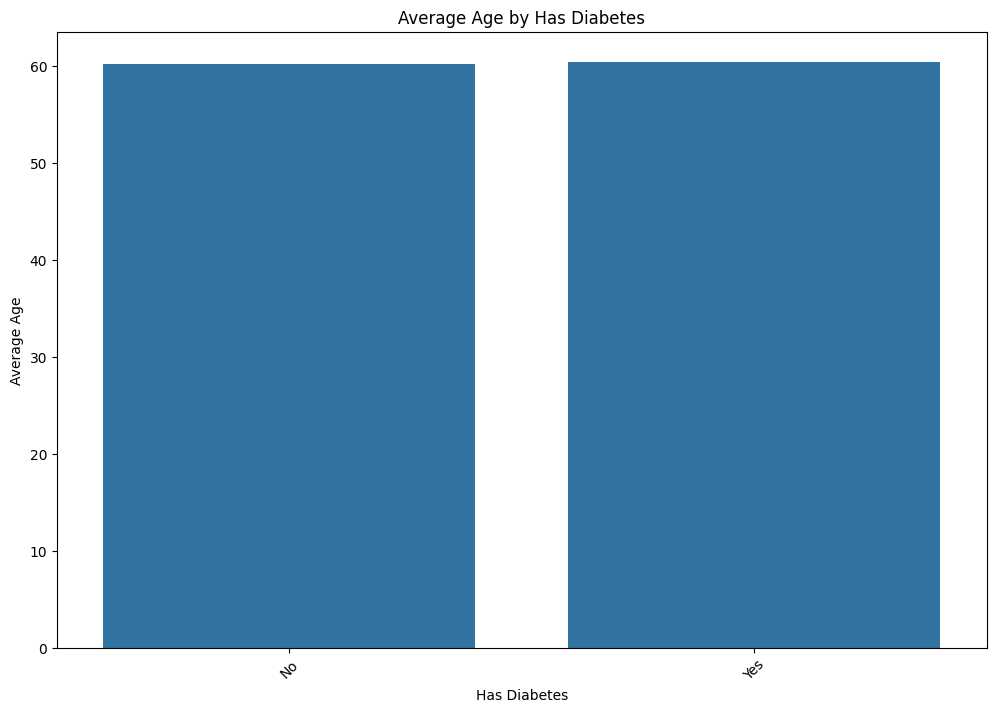

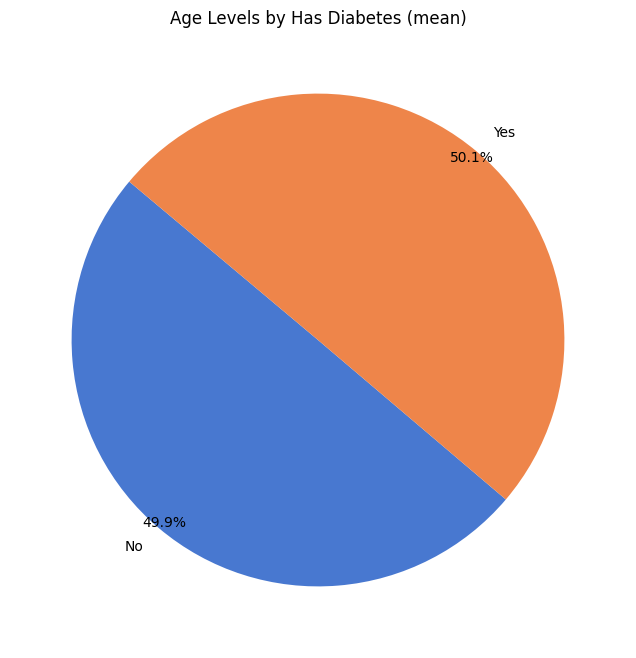

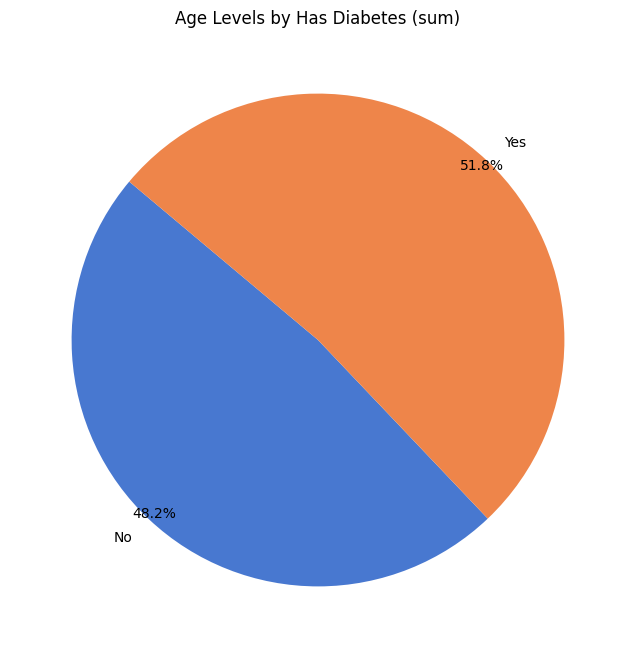

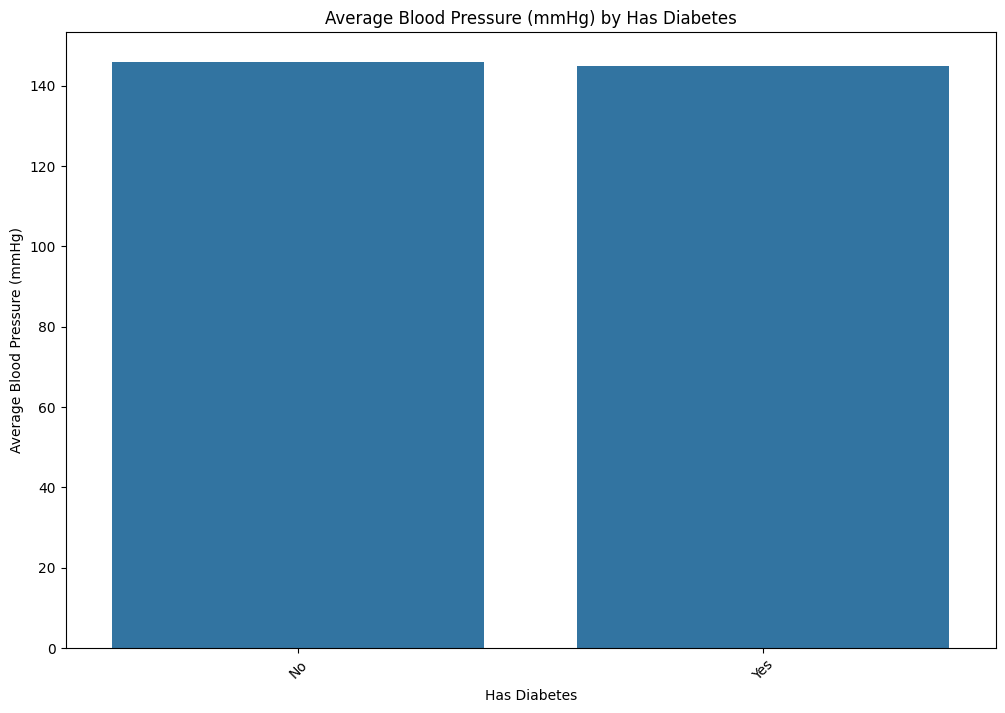

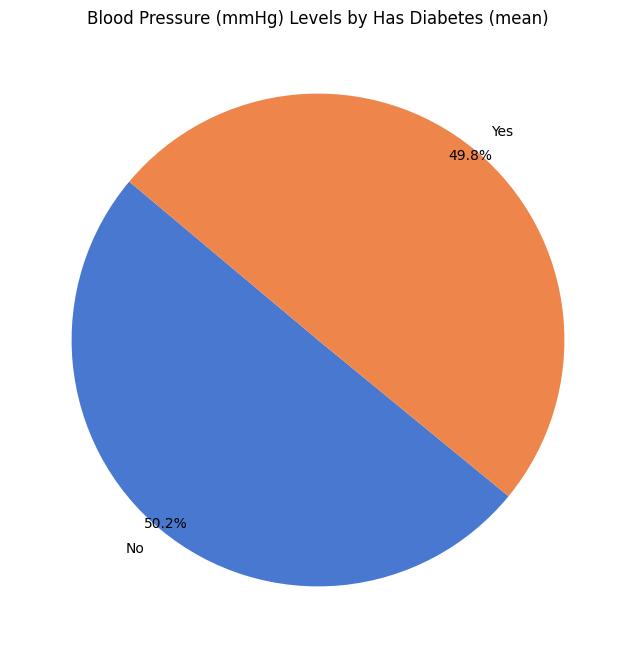

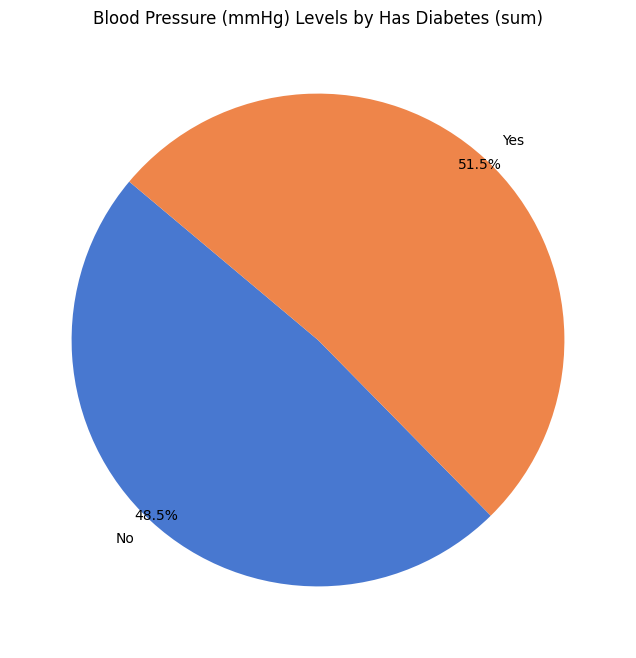

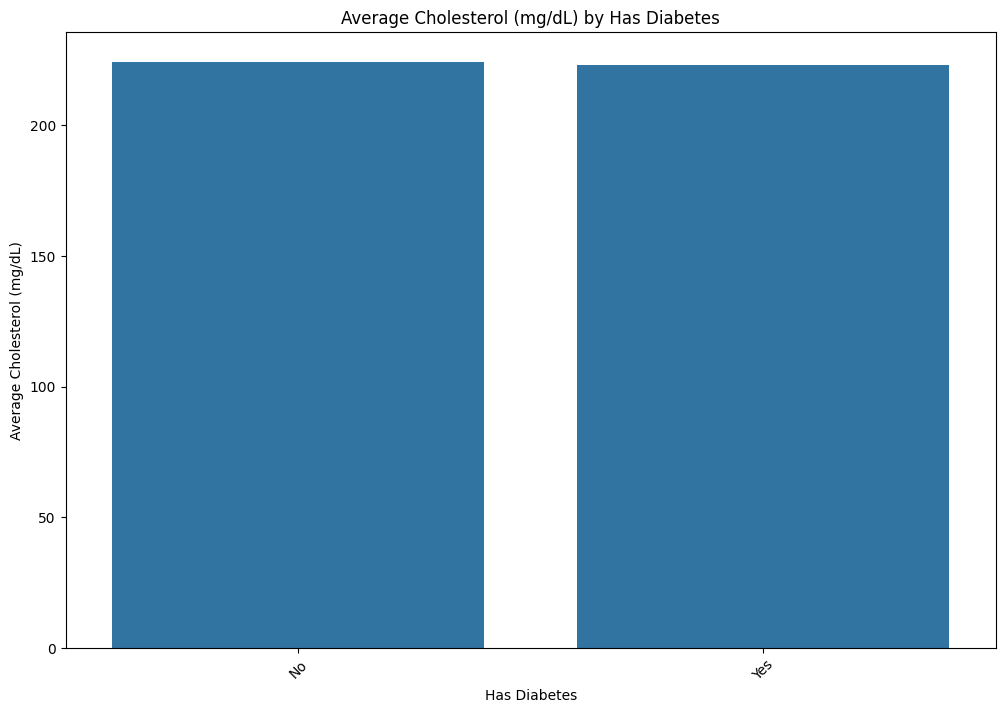

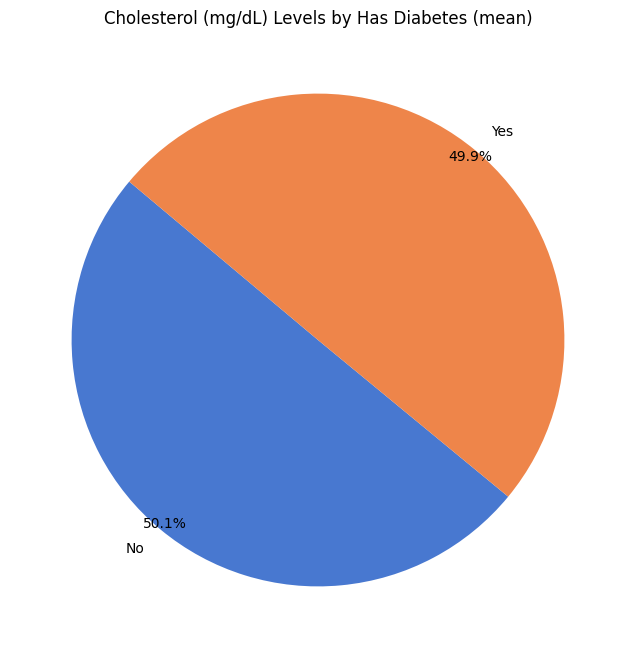

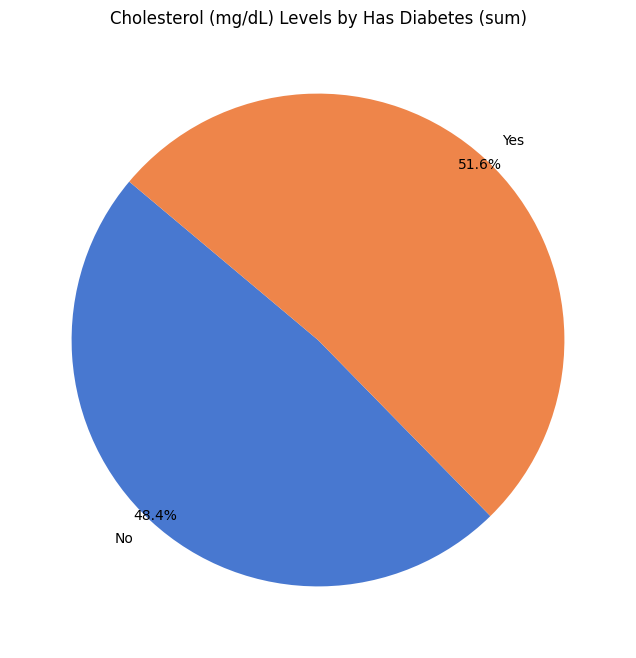

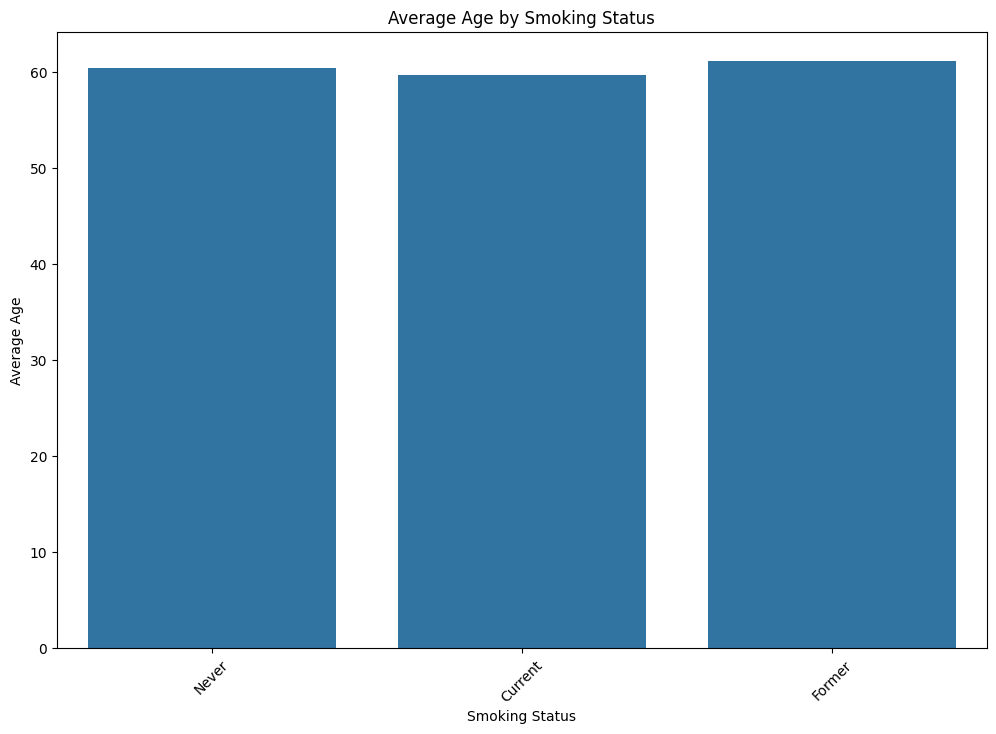

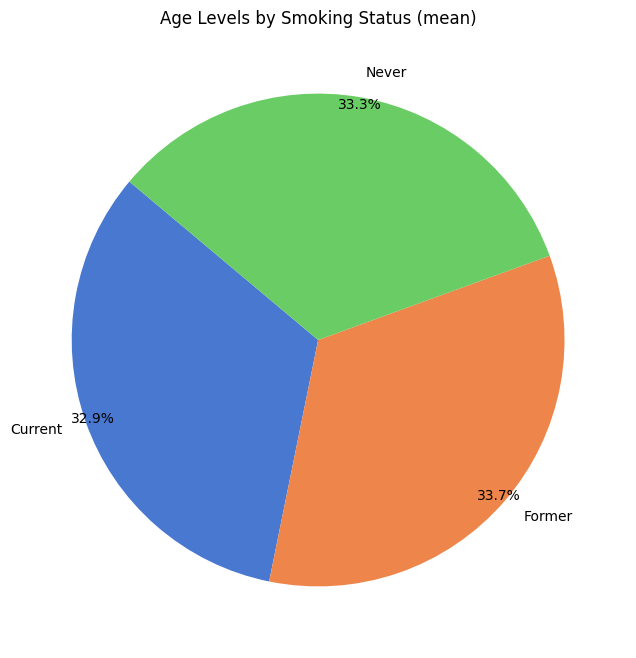

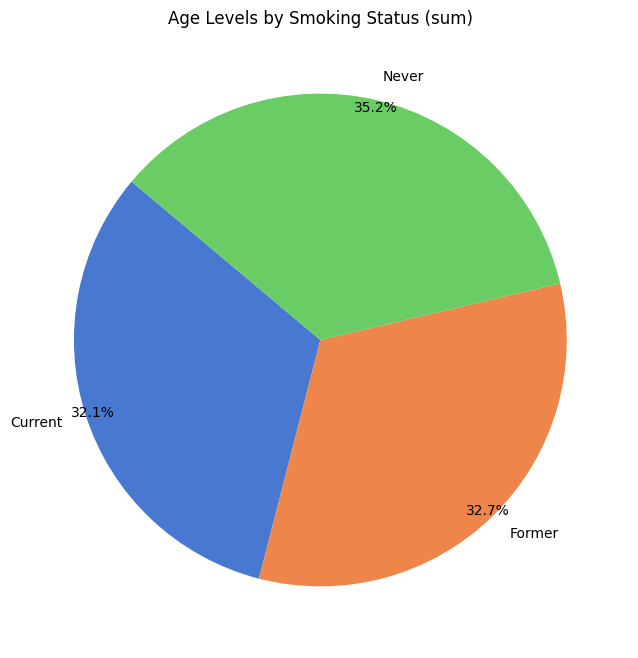

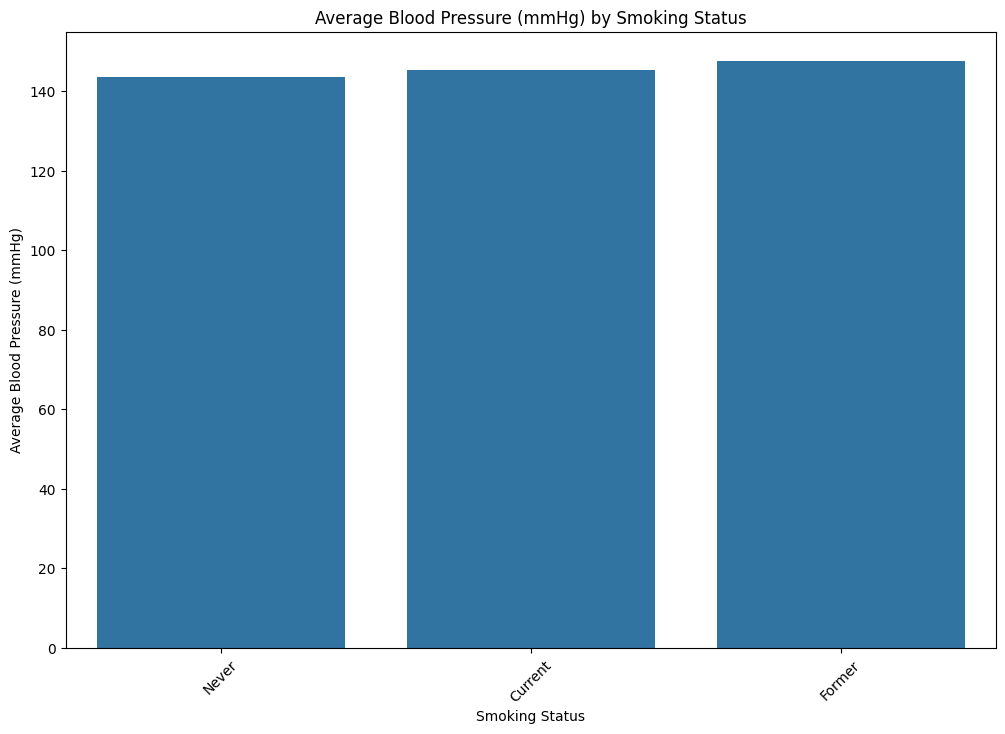

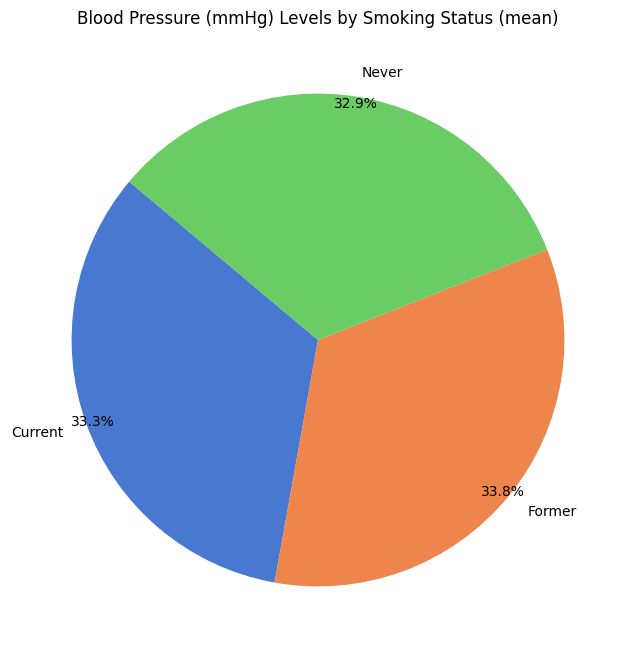

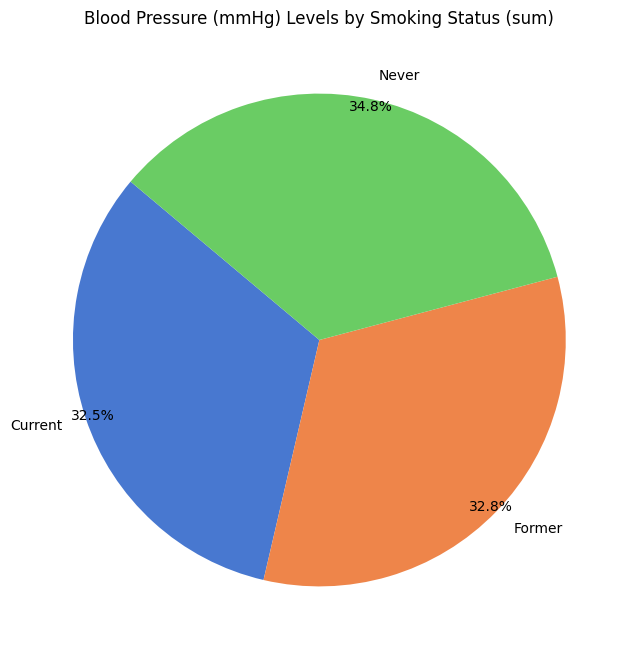

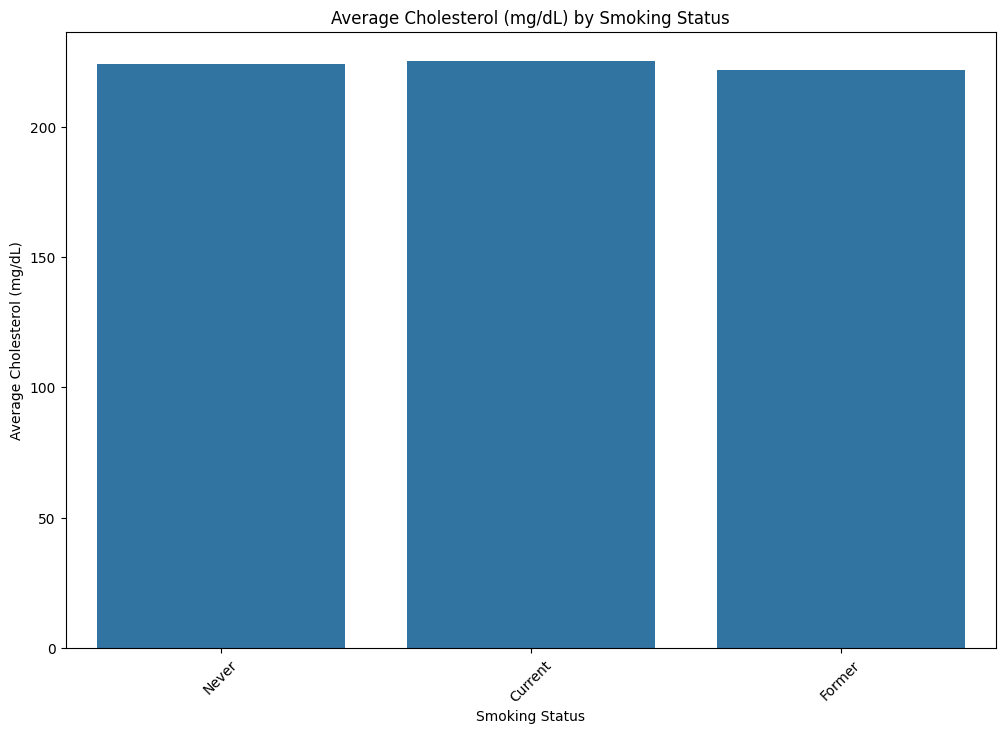

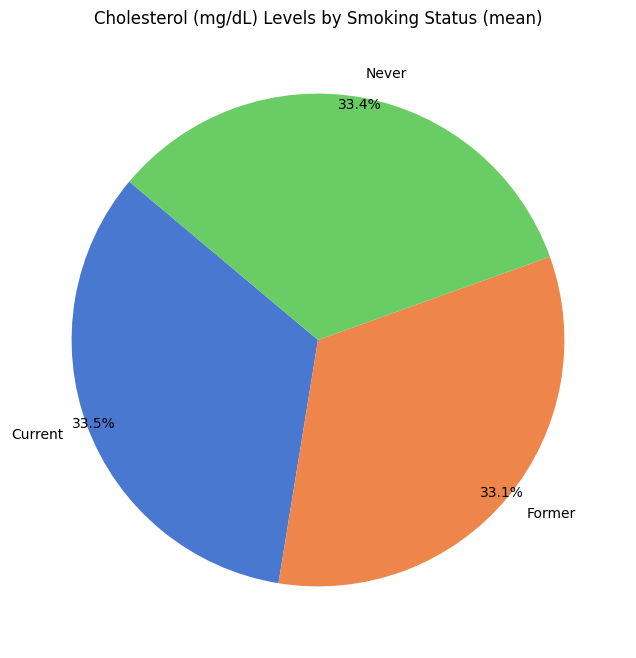

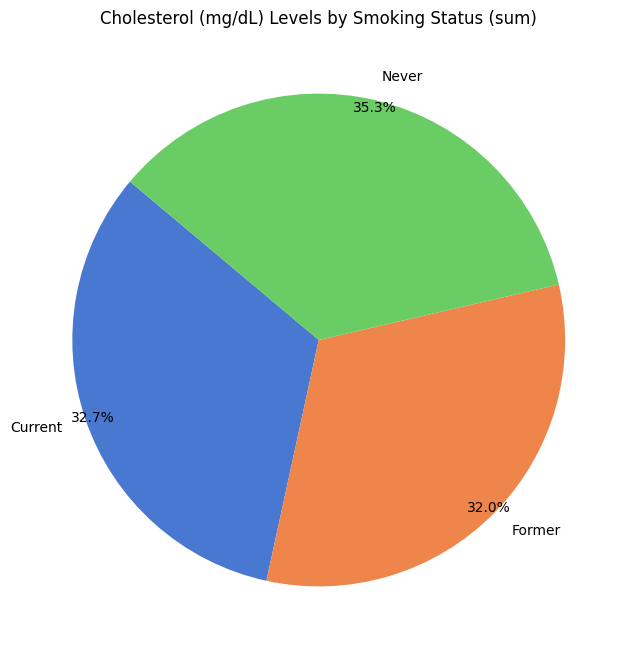

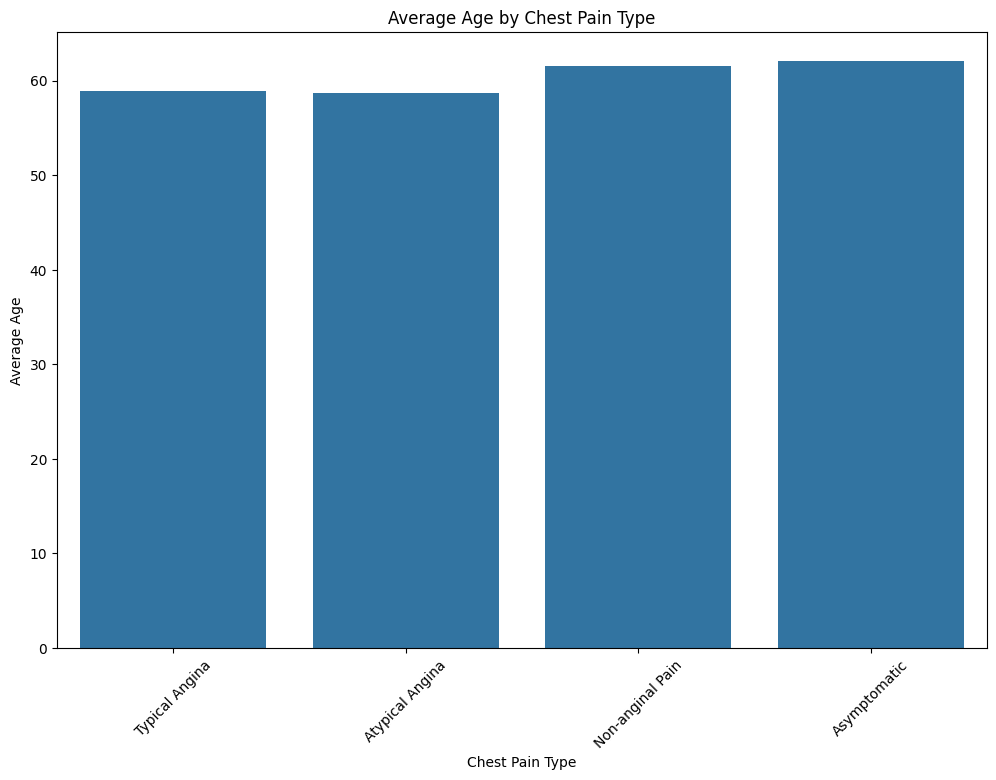

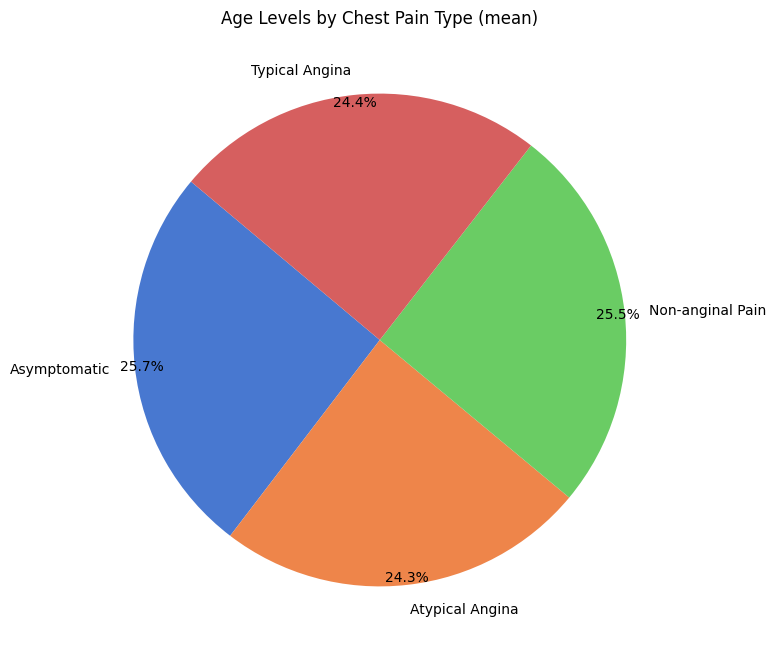

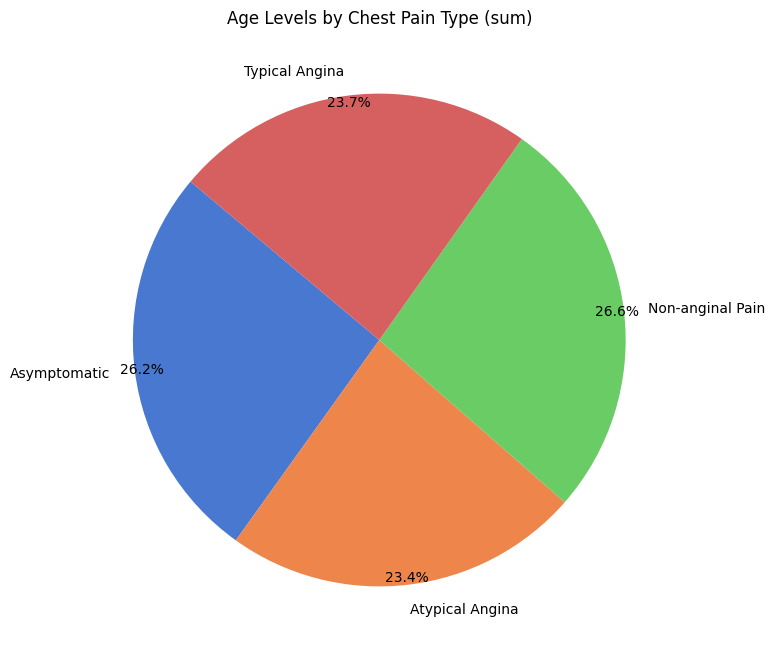

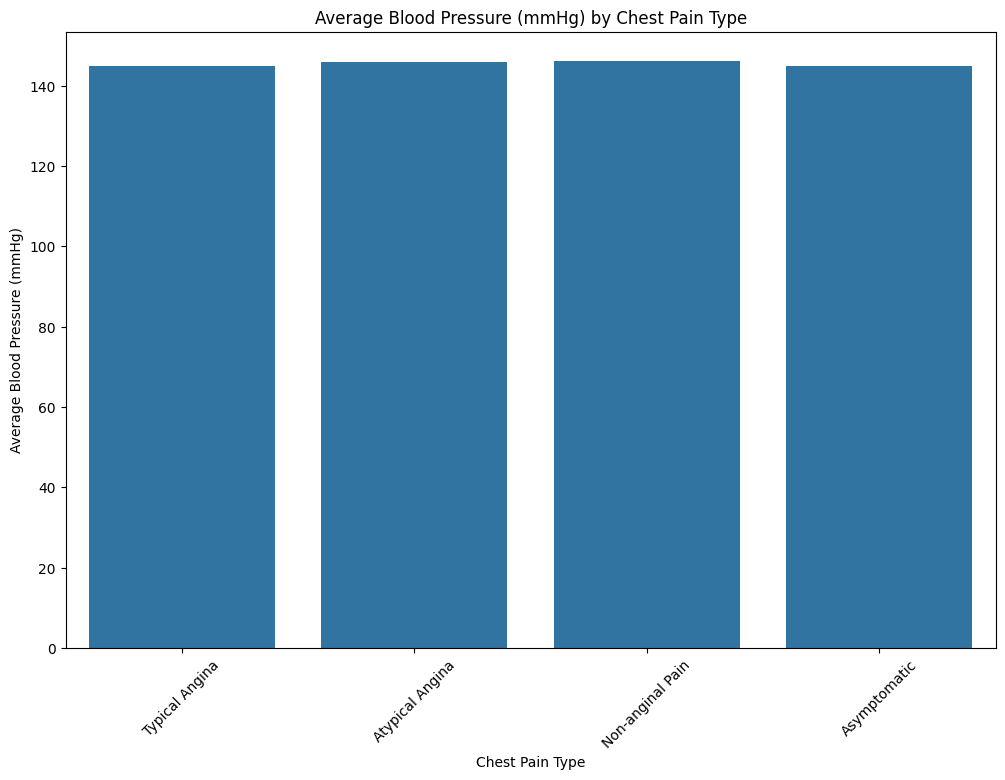

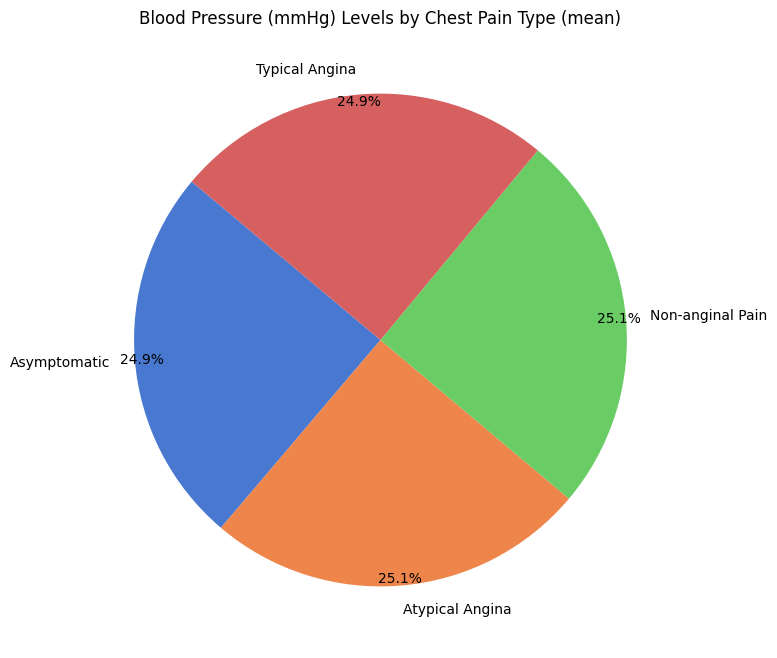

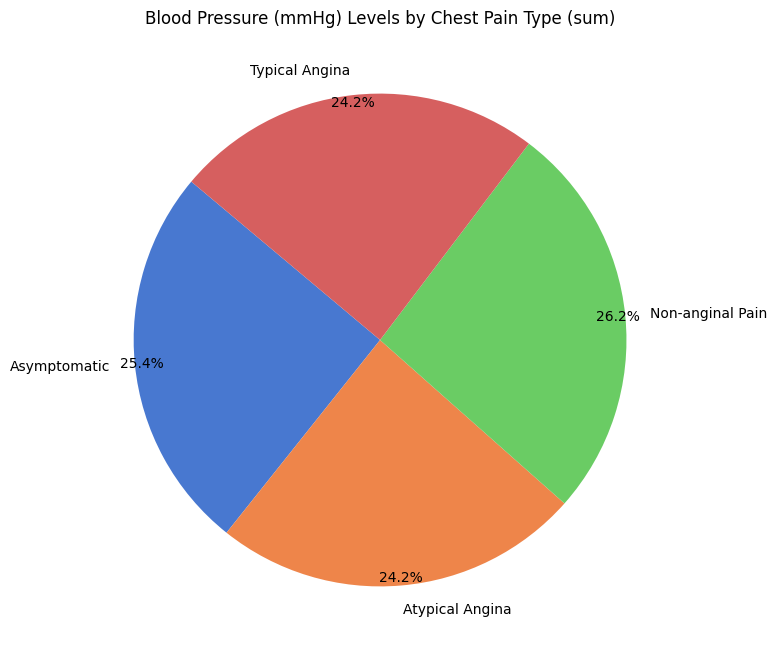

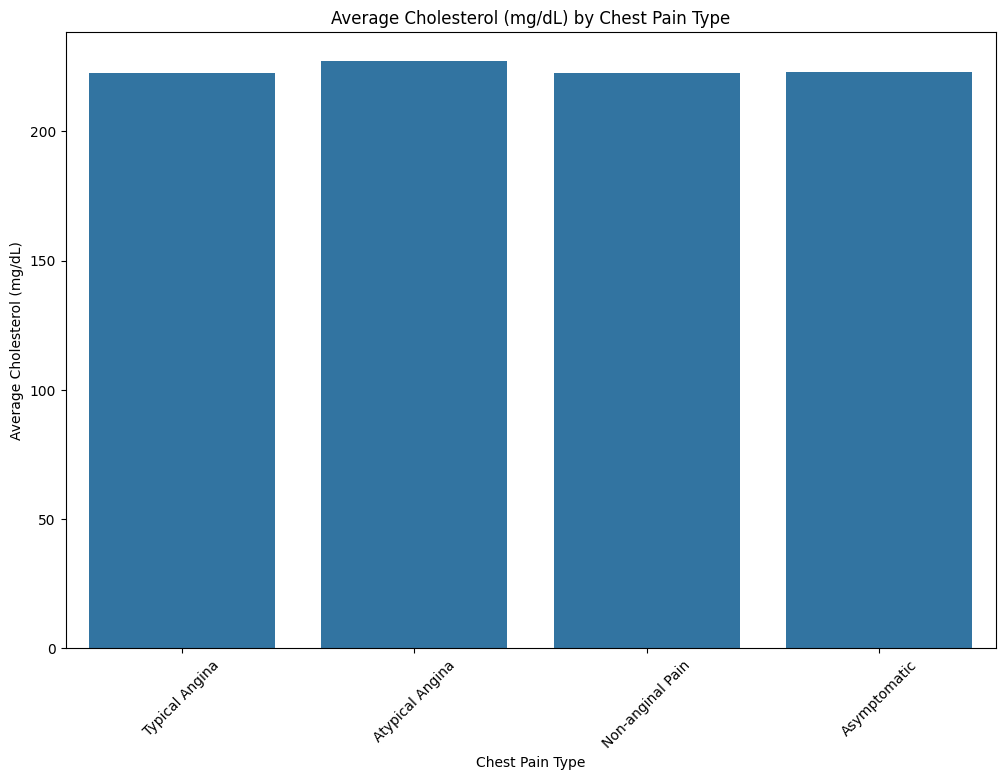

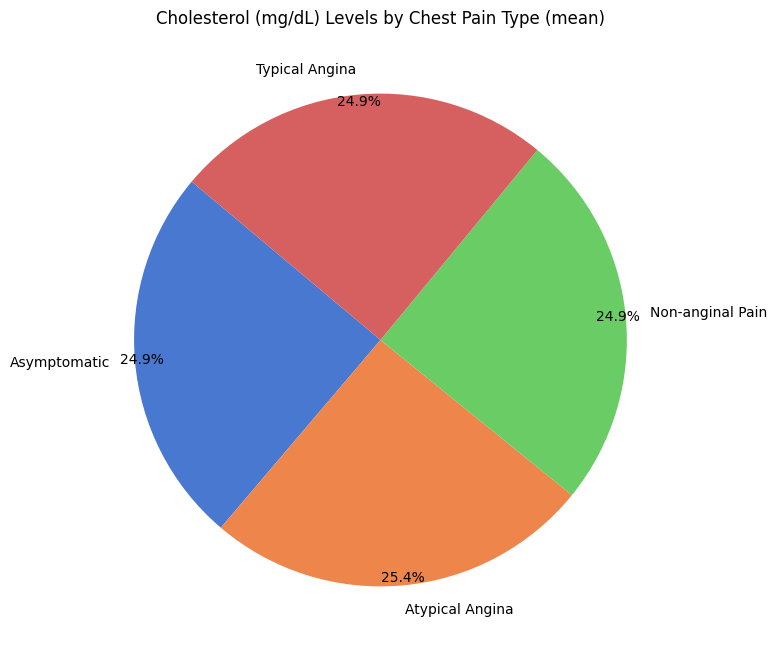

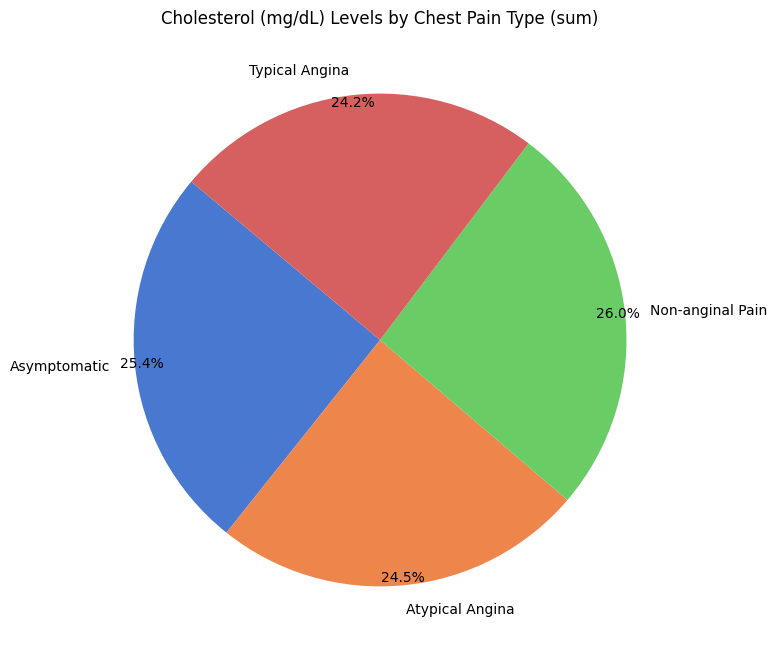

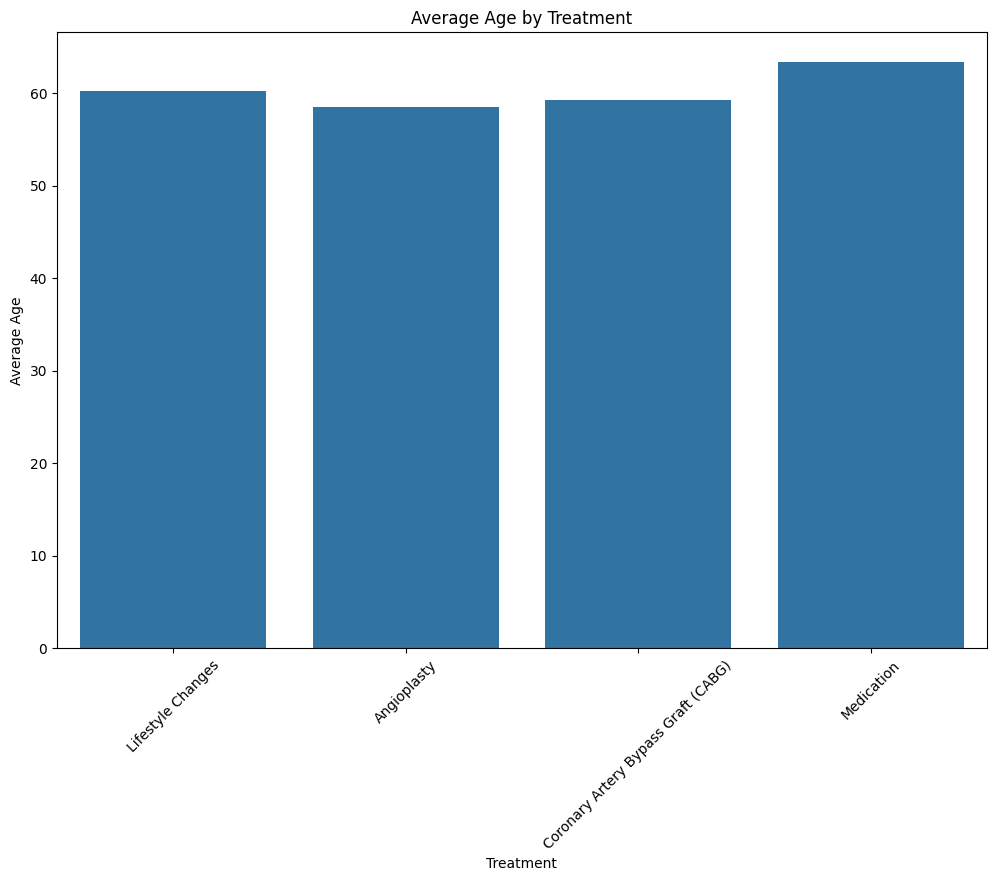

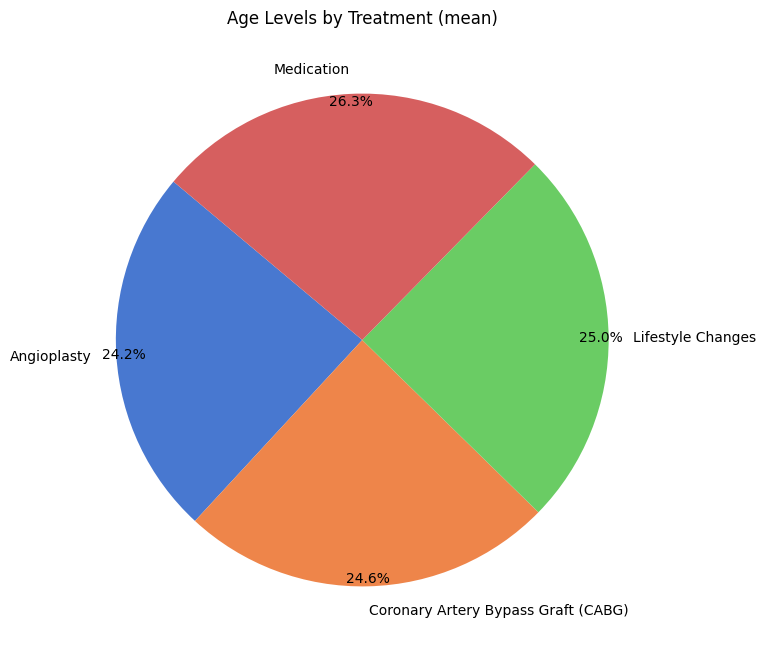

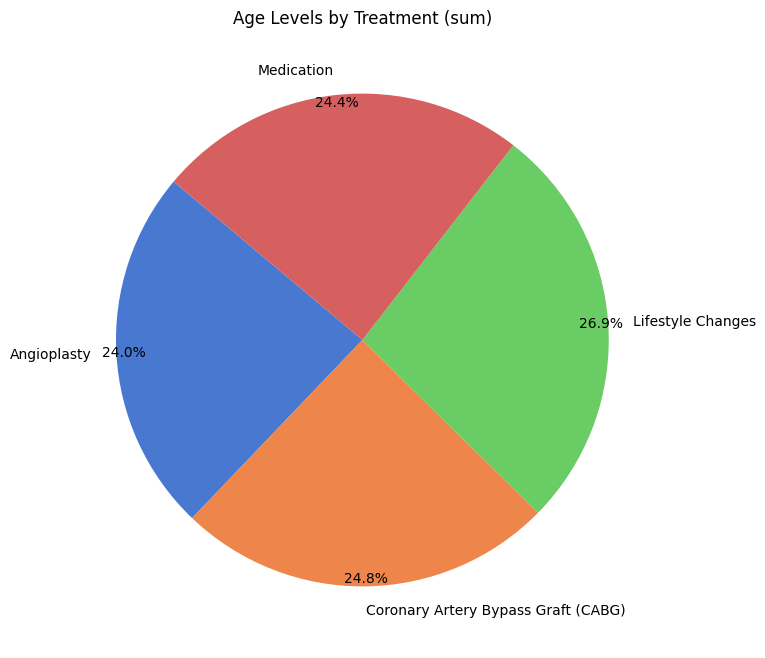

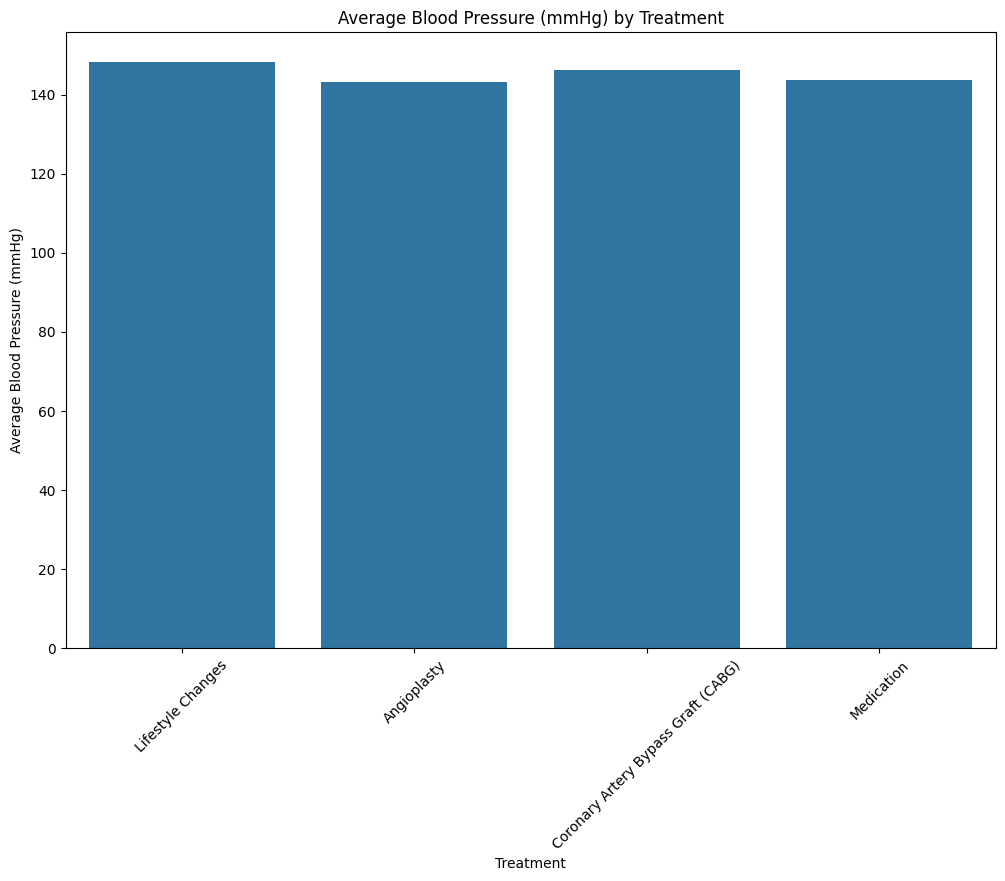

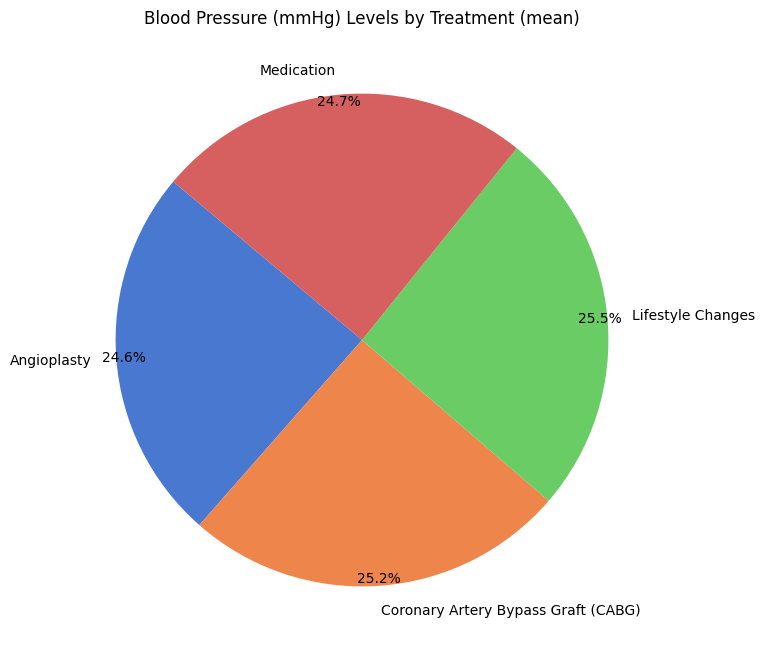

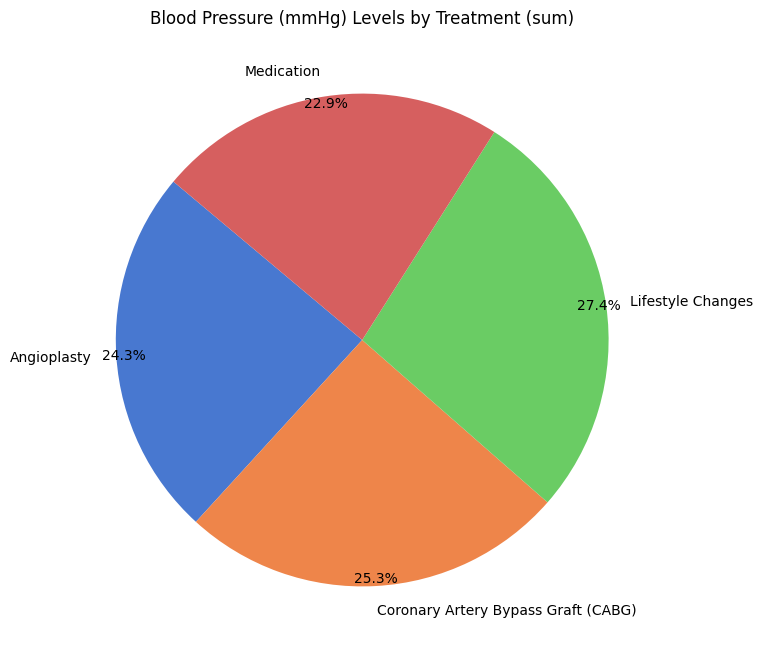

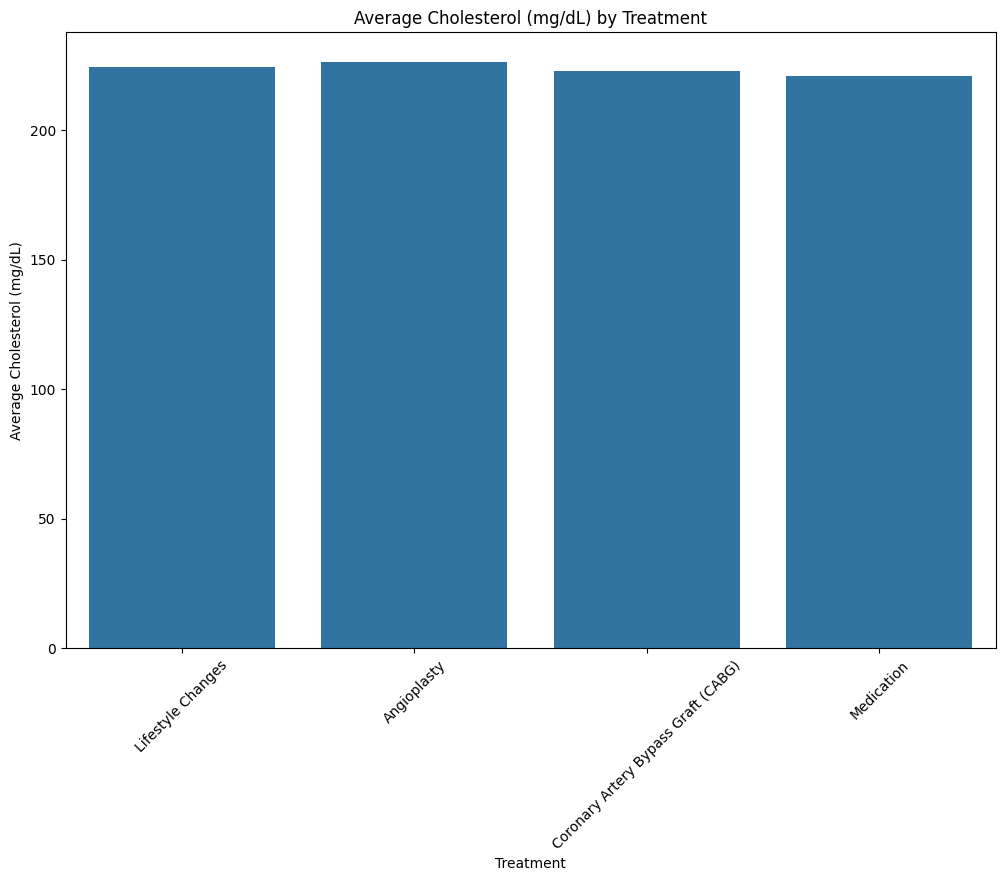

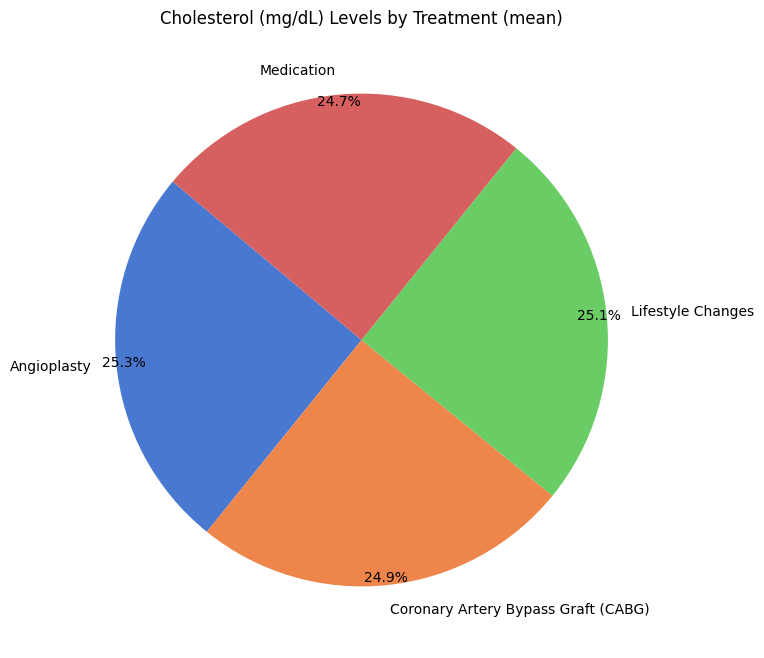

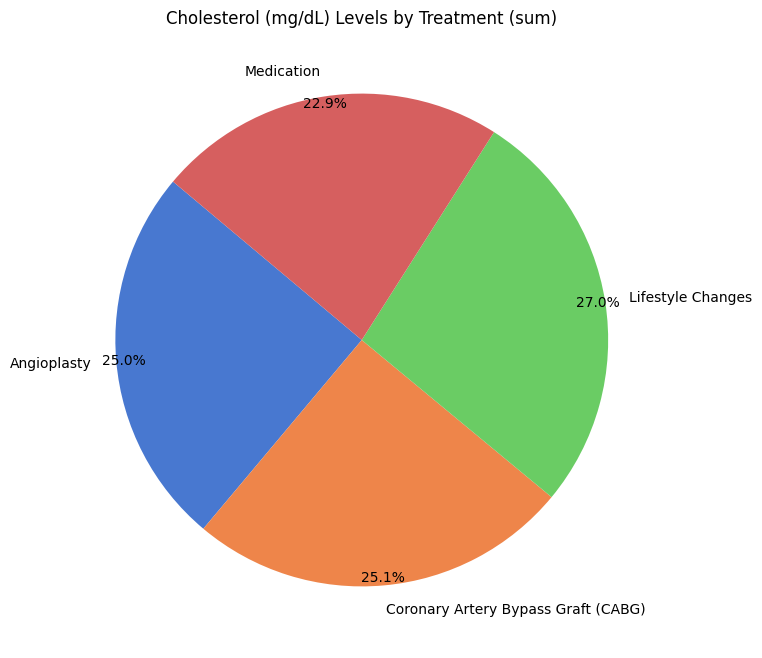

In [ ]:
# List of key numerical variables and categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Create bar charts comparing average values across different categories
for cat in categorical_columns:
  for num in numerical_columns:
    dsv.vertical_bar_chart(df, x_column=cat, y_column=num, x_name=cat, y_name=num)
    dsv.show_piechart(df,name_group_col=cat,name_data_col=num)
    dsv.show_piechart(df,name_group_col=cat,name_data_col=num,kind_group="sum")



# **Extended researching**

For expand and deepen the analysis using the full functionality of the `DataStudio` class, I implement a more comprehensive approach. This will not only refine our current findings but also extract more meaningful insights from both categorical and continuous variables.

Here’s how I been proceed:



## 1. **Advanced Correlation Analysis**:
   We can extend the previous correlation heatmap by including a specific focus on subgroups or using different filtering techniques. For instance, analysing correlations within specific age ranges or cholesterol levels.

   This will help us understand whether age or other variables have a stronger correlation in older individuals, offering a more focused analysis on higher-risk groups.



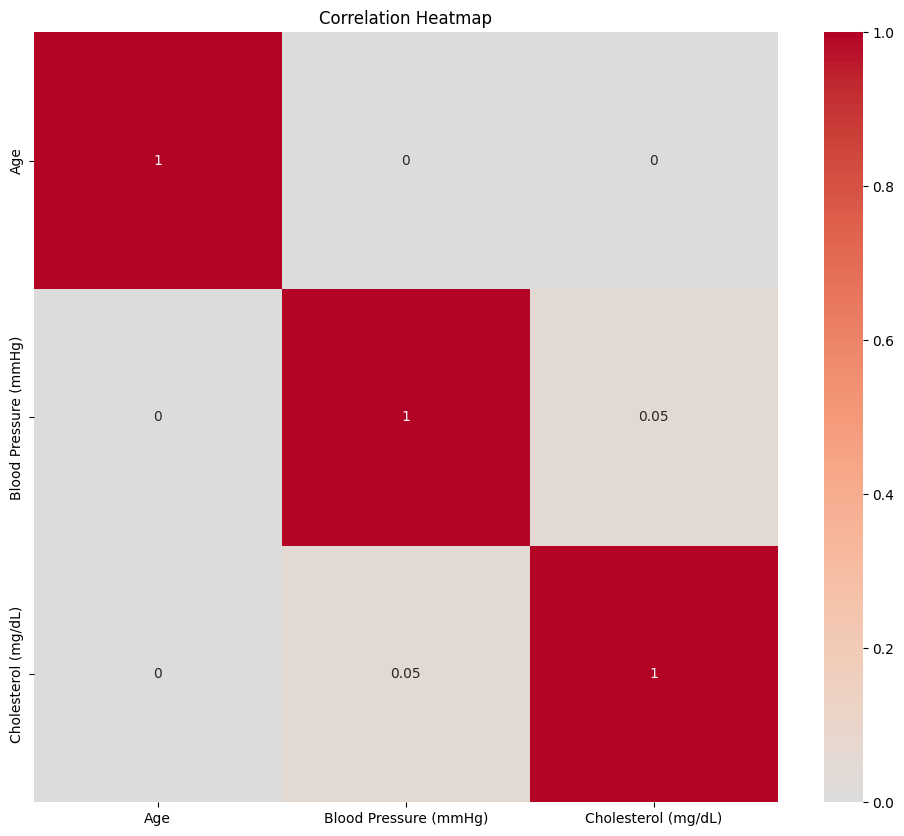

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
Age,1.0,0.00,0.00
Blood Pressure (mmHg),0.0,1.00,0.05
Cholesterol (mg/dL),0.0,0.05,1.00


In [ ]:
# Correlation heatmap for age group over 50
filtered_data = df[df['Age'] > 50]
dsv.create_correlation_heatmap(filtered_data)



## 2. **Group-based Analysis of Categorical Data**:
   The previous analysis was quite high-level. By using the `vertical_bar_chart()` method, we can visualise categorical variables across different subgroups.
   

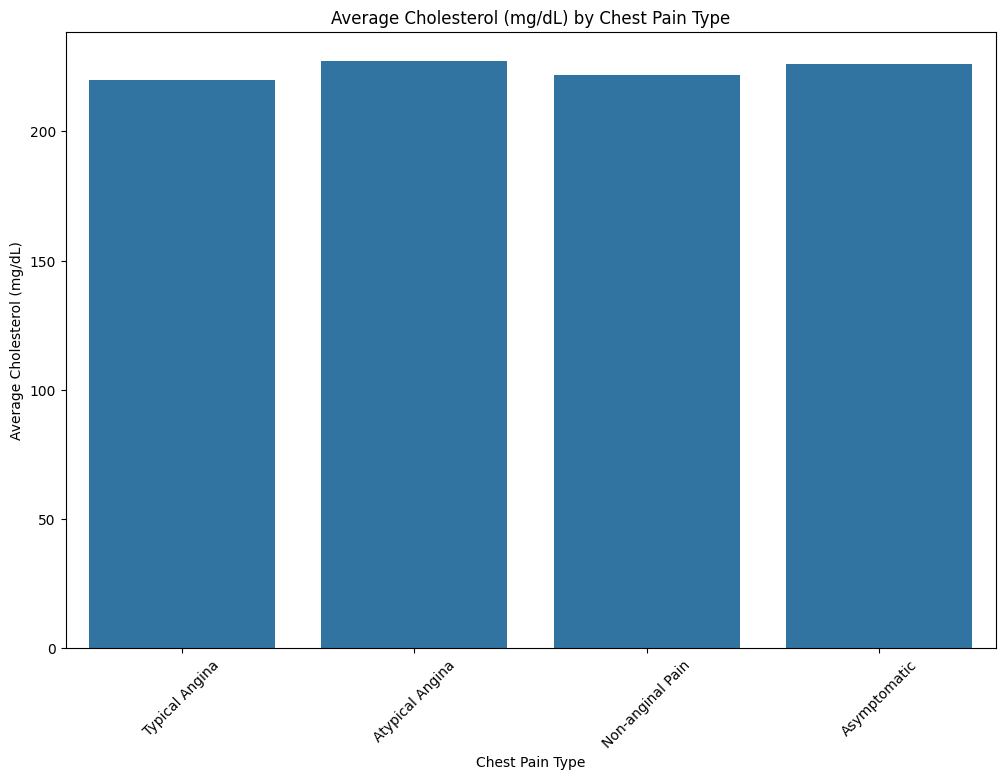

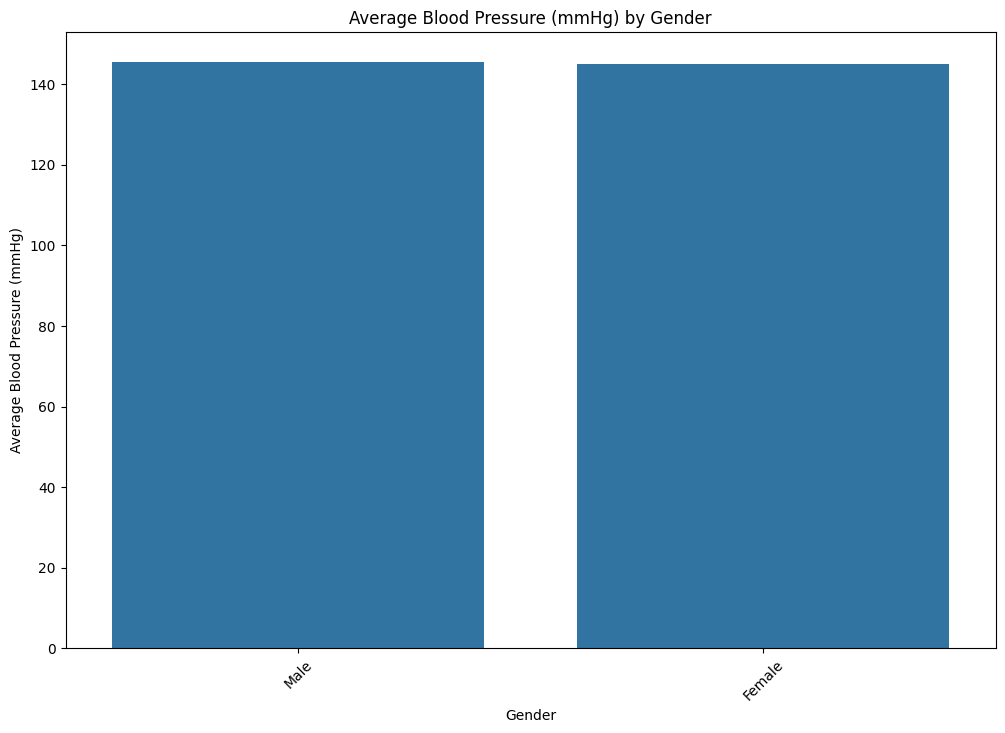

True

In [ ]:
# Group by Chest Pain Type and calculate mean cholesterol
dsv.vertical_bar_chart(filtered_data, x_column='Chest Pain Type', y_column='Cholesterol (mg/dL)', x_name='Chest Pain Type', y_name='Cholesterol (mg/dL)')

# Group by Gender and calculate average Blood Pressure
dsv.vertical_bar_chart(filtered_data, x_column='Gender', y_column='Blood Pressure (mmHg)', x_name='Gender', y_name='Blood Pressure (mmHg)')



   **Goal**: By grouping categorical data, we can investigate whether chest pain types or gender significantly affect key risk factors like cholesterol and blood pressure.

   ---

## 3. **Multivariate Analysis**:
   We can apply scatter plots or pairwise plots to explore the relationships between multiple variables. This allows us to visualise potential interactions between factors such as age, cholesterol, and blood pressure.
   
   So, to observe how these variables interact and whether there are specific patterns that emerge when we consider multiple factors simultaneously.

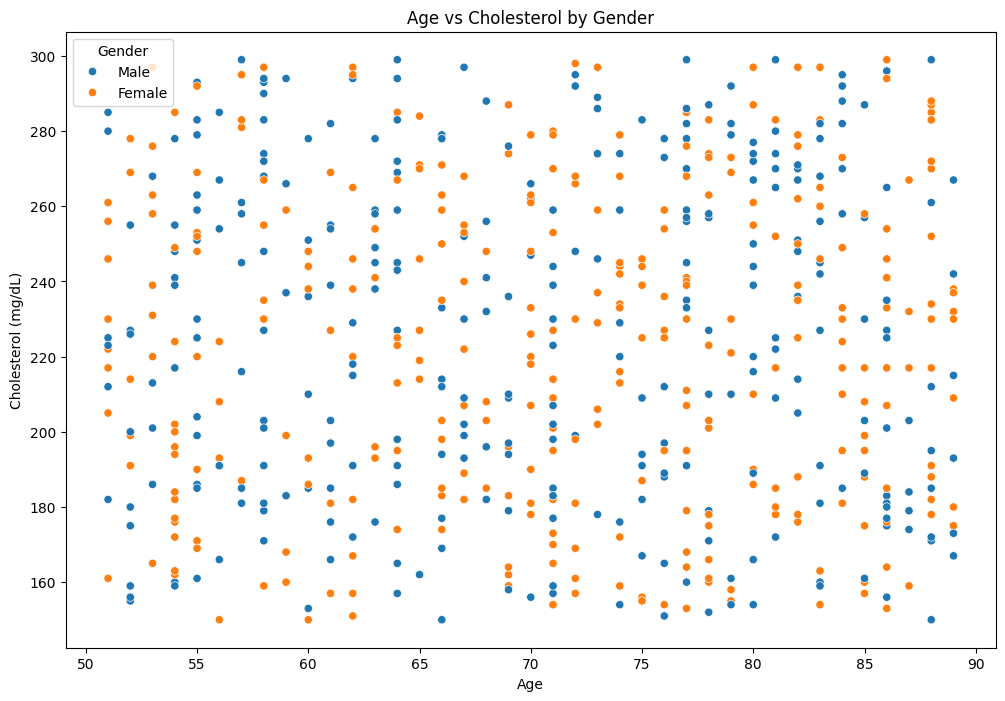

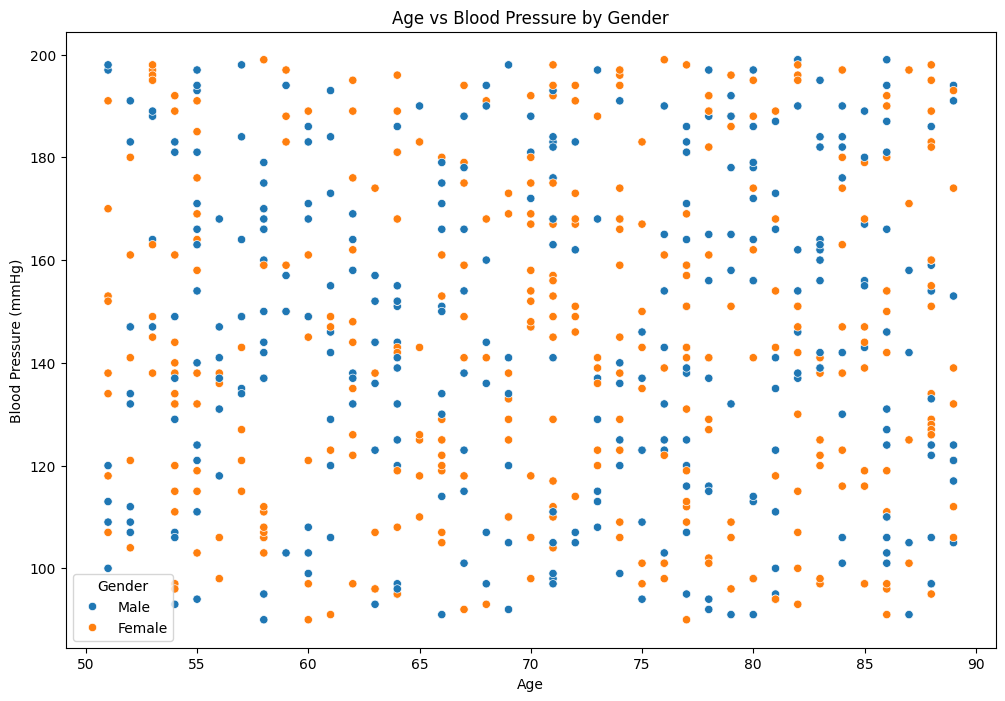

In [ ]:

# Scatter plot of Age vs Cholesterol by Gender
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_data, x='Age', y='Cholesterol (mg/dL)', hue='Gender')
plt.title('Age vs Cholesterol by Gender')
plt.show()

# Scatter plot of Age vs Blood Pressure by Gender
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_data, x='Age', y='Blood Pressure (mmHg)', hue='Gender')
plt.title('Age vs Blood Pressure by Gender')
plt.show()



### 4. **Line of Best Fit**:
   Now, generating **line of best fit** for `Age` vs. `Cholesterol (mg/dL)` and `Age` vs. `Blood Pressure (mmHg)` using the `filtered_data` (where the `Age > 50` condition was applied).

- The first plot will show the line of best fit between **Age** and **Cholesterol levels**, which helps in identifying the trend of how cholesterol changes with age in people over 50.
- The second plot will show the line of best fit between **Age** and **Blood Pressure**, which will help in understanding the relationship between increasing age and blood pressure levels in the older age group.


   

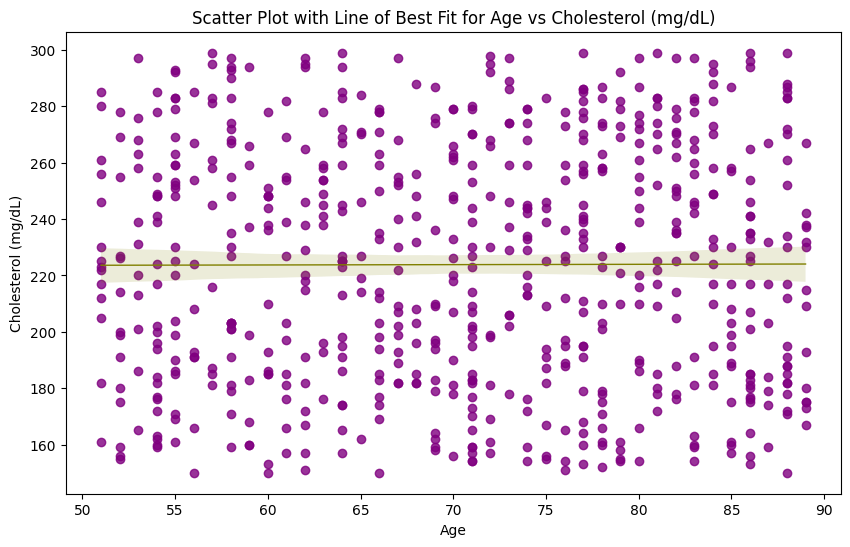

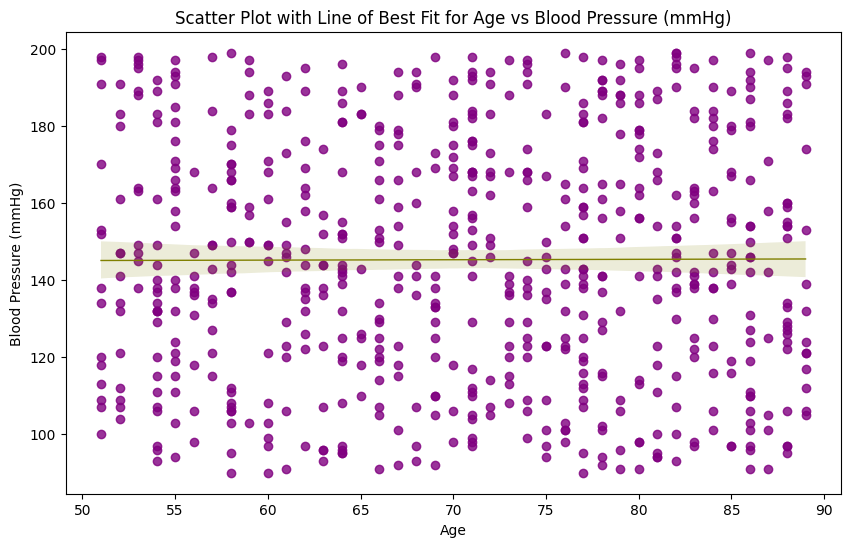

True

In [ ]:
# Generate line of best fit for Age vs. Cholesterol (mg/dL) for age group > 50
dsv.plot_line_of_best_fit(filtered_data, name_x='Age', name_y='Cholesterol (mg/dL)')

# Generate line of best fit for Age vs. Blood Pressure (mmHg) for age group > 50
dsv.plot_line_of_best_fit(filtered_data, name_x='Age', name_y='Blood Pressure (mmHg)')



### 5. **Line plots**:
1. **Age vs. Cholesterol (mg/dL)**:
   - The plot will show how cholesterol levels change as age increases. We will look for any upward or downward trends.
   - The red dashed line (if `with_average=True`) will indicate the average cholesterol level across all ages, helping to identify whether specific age groups are above or below the average.

2. **Age vs. Blood Pressure (mmHg)**:
   - This plot visualizes the relationship between age and blood pressure. We will check whether blood pressure tends to increase with age or shows any particular trend.
   - The average blood pressure is also plotted to help assess whether particular age groups are at risk based on higher or lower blood pressure.

#### **Conclusions:**
- **Age vs. Cholesterol**: If the line plot reveals an upward trend, it could indicate that cholesterol tends to increase with age, possibly contributing to higher risks for older individuals. Conversely, if it's flat or downward, it may suggest stable or decreasing cholesterol levels with age.
  
- **Age vs. Blood Pressure**: A rising line would indicate that older individuals tend to have higher blood pressure, which is a common risk factor for heart-related issues. If the line is flat or fluctuates, it may indicate other influencing factors.
   

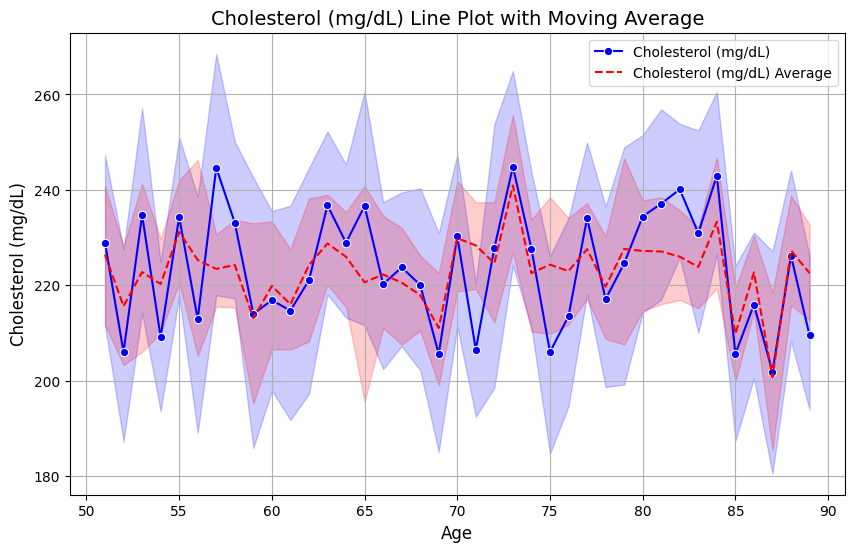

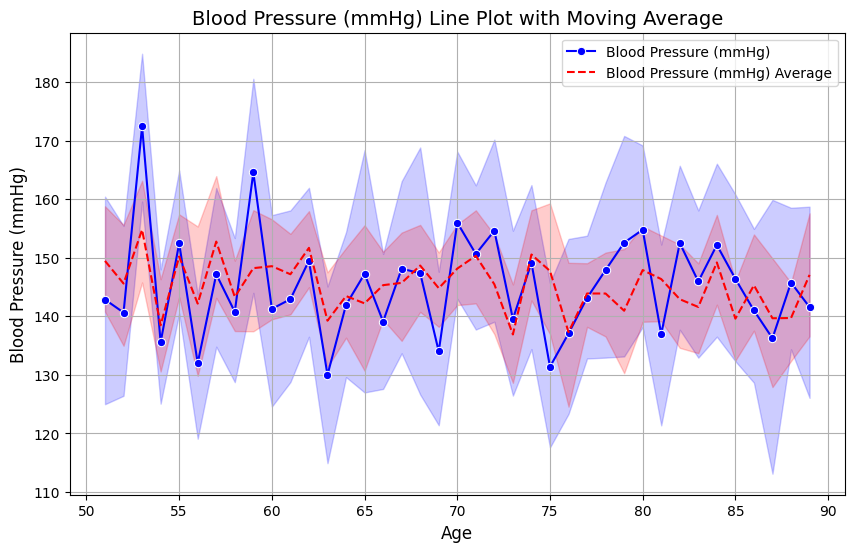

In [ ]:
# Call the DataStudio line_plot method for Age vs Cholesterol (mg/dL)
result = dsv.line_plot(filtered_data, x_column='Age', y_column='Cholesterol (mg/dL)', with_average=True)

# Call the DataStudio line_plot method for Age vs Blood Pressure (mmHg)
result = dsv.line_plot(filtered_data, x_column='Age', y_column='Blood Pressure (mmHg)', with_average=True)


###  6. **Age Group Analysis**

- **Creating a detailed breakdown of the dataset** by age group to gain insights into how various factors are distributed. This includes examining the distribution of gender, diabetes status, smoking status, and treatment types for age groups such as 30s, 40s, 50s, 60s, 70s, and 80s.

- **Group Data by Age and Calculate Statistics:**
   - Compute summary statistics for each age group.
   - Evaluate the distribution of categorical variables (e.g., gender, diabetes status) within each age group.

- **Visualize Distributions:**
   - Using bar plots to show the distribution of categorical variables across age groups.
   - Generate box plots to display statistical measures such as the average cholesterol or blood pressure for each age group.

**The goal** of this analysis is to provide insights that contribute to a better understanding of age-related health dynamics and support the development of informed public health strategies.


Age Group Statistics:
            Age                      Blood Pressure (mmHg)             \
          count       mean       std                  mean        std   
Age Group                                                               
30s         152  34.875000  2.714476            146.276316  32.527970   
40s         176  44.556818  3.058881            144.977273  32.953292   
50s         157  54.509554  2.751731            146.445860  30.783653   
60s         150  64.480000  2.815871            141.980000  30.020903   
70s         186  74.451613  2.939079            146.698925  31.703452   
80s         179  84.452514  2.858406            145.893855  32.427186   

          Cholesterol (mg/dL)             \
                         mean        std   
Age Group                                  
30s                224.151316  42.914015   
40s                223.136364  44.639811   
50s                224.878981  42.874945   
60s                221.993333  40.445588   
70s         

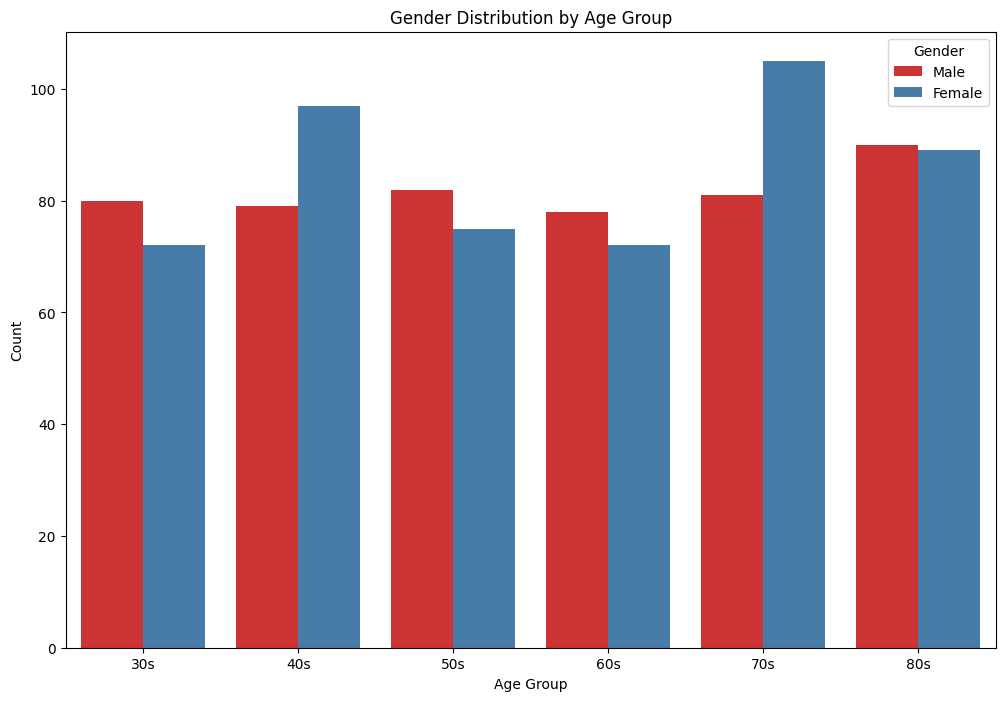

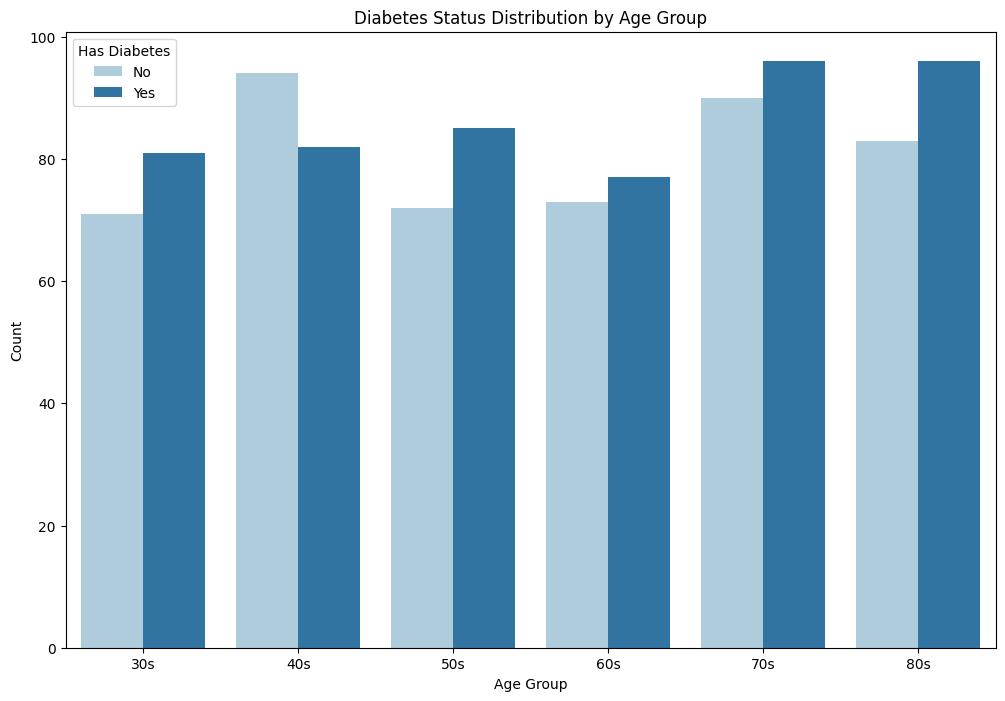

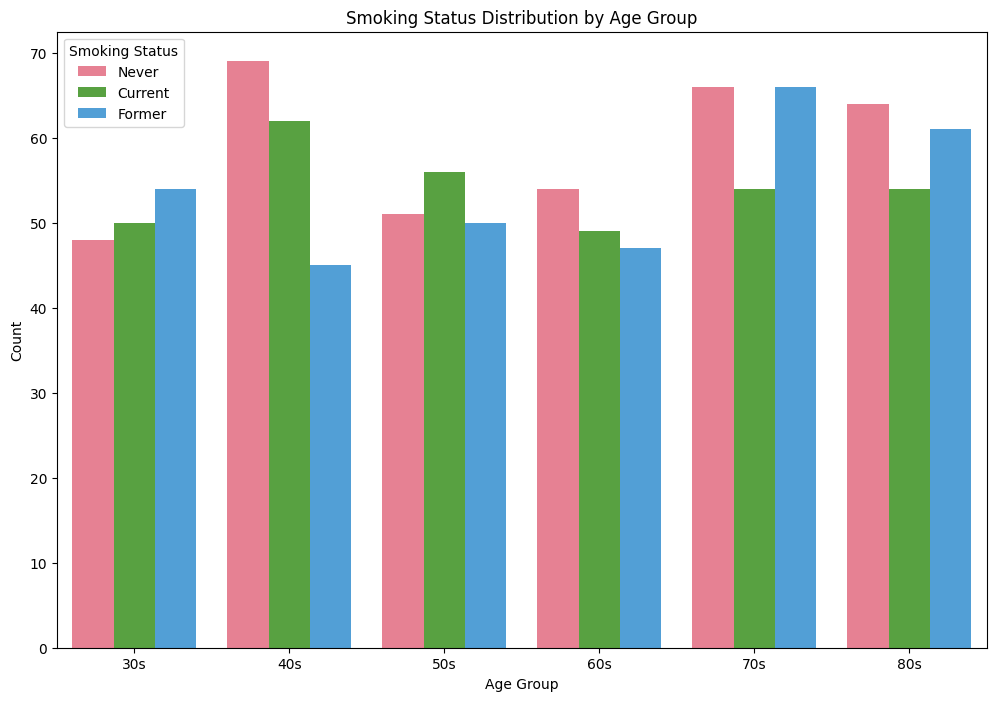

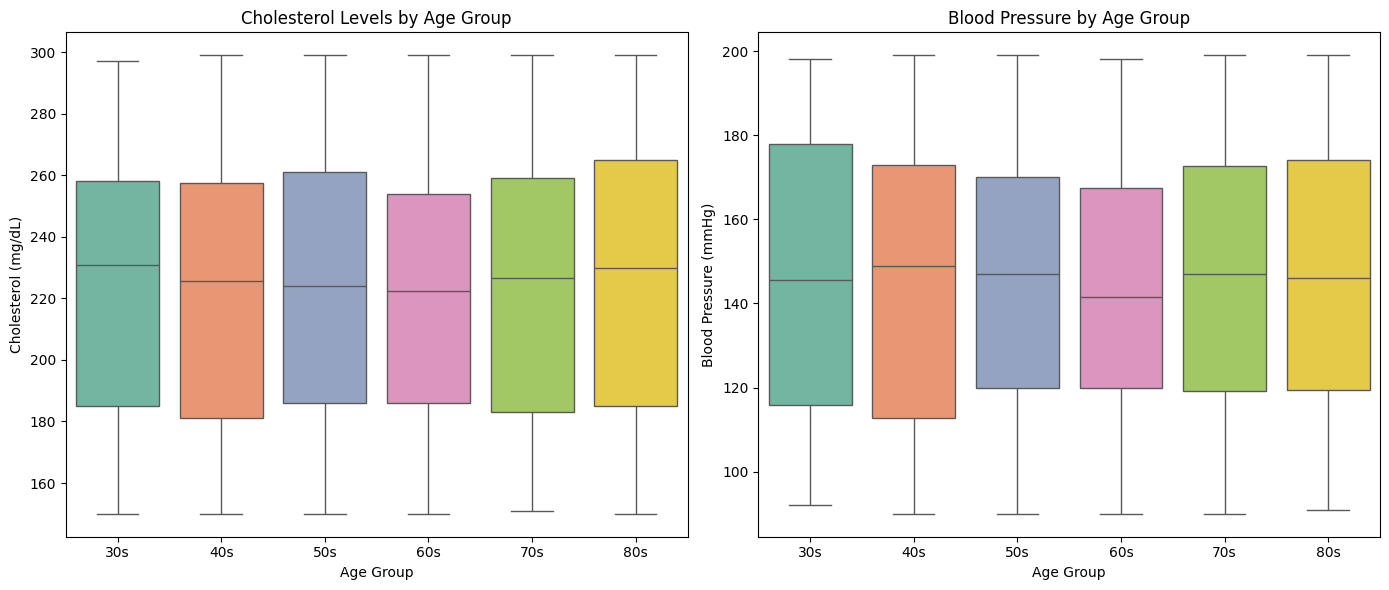


Dataset with Age Groups:
   Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL) Has Diabetes  \
0    Male   70                    181                  262           No   
1  Female   55                    103                  253          Yes   
2    Male   42                     95                  295          Yes   
3    Male   84                    106                  270           No   
4    Male   86                    187                  296          Yes   

  Smoking Status   Chest Pain Type                            Treatment  \
0          Never    Typical Angina                    Lifestyle Changes   
1          Never   Atypical Angina                          Angioplasty   
2        Current    Typical Angina                          Angioplasty   
3          Never   Atypical Angina  Coronary Artery Bypass Graft (CABG)   
4        Current  Non-anginal Pain                           Medication   

  Age Group Dummy  
0       70s   All  
1       50s   All  
2       40s 

In [ ]:
# Define age groups
def create_age_groups(df):
    bins = [30, 40, 50, 60, 70, 80, 90]
    labels = ['30s', '40s', '50s', '60s', '70s', '80s']
    df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    return df

# Apply age grouping
df_grouped = create_age_groups(df_final_cleaned)

# Calculate statistics for each age group
age_group_stats = df_grouped.groupby('Age Group', observed=True).agg({
    'Age': ['count', 'mean', 'std'],
    'Blood Pressure (mmHg)': ['mean', 'std'],
    'Cholesterol (mg/dL)': ['mean', 'std'],
    'Gender': lambda x: x.value_counts(normalize=True).to_dict(),
    'Has Diabetes': lambda x: x.value_counts(normalize=True).to_dict(),
    'Smoking Status': lambda x: x.value_counts(normalize=True).to_dict(),
    'Treatment': lambda x: x.value_counts(normalize=True).to_dict()
})

print("Age Group Statistics:")
print(age_group_stats)
print()

# Define a custom color palette for boxplots
palette_boxplot = sns.color_palette("Set2", n_colors=len(df_grouped['Age Group'].unique()))

# Visualization of age group distributions

# Gender distribution by age group
plt.figure(figsize=(12, 8))
sns.countplot(data=df_grouped, x='Age Group', hue='Gender', palette='Set1')
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Diabetes status distribution by age group
plt.figure(figsize=(12, 8))
sns.countplot(data=df_grouped, x='Age Group', hue='Has Diabetes', palette='Paired')
plt.title('Diabetes Status Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Has Diabetes')
plt.show()

# Smoking status distribution by age group
plt.figure(figsize=(12, 8))
sns.countplot(data=df_grouped, x='Age Group', hue='Smoking Status', palette='husl')
plt.title('Smoking Status Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.show()

# Average cholesterol and blood pressure by age group
plt.figure(figsize=(14, 6))

# Boxplot for Cholesterol Levels by Age Group
plt.subplot(1, 2, 1)
sns.boxplot(x='Age Group', y='Cholesterol (mg/dL)', data=df_grouped, hue='Age Group', palette=palette_boxplot)
plt.title('Cholesterol Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Cholesterol (mg/dL)')

# Boxplot for Blood Pressure by Age Group
plt.subplot(1, 2, 2)
sns.boxplot(x='Age Group', y='Blood Pressure (mmHg)', data=df_grouped, hue='Age Group', palette=palette_boxplot)
plt.title('Blood Pressure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Blood Pressure (mmHg)')

plt.tight_layout()
plt.show()
print()

# Display the first few rows of the dataset with age groups
print("Dataset with Age Groups:")
print(df_grouped.head())


#### **Summary and Analysis of Age Group Statistics**

##### **1. Age Distribution and General Observations**

- **Age Groups**:
  - The dataset is segmented into six distinct age groups: 30s, 40s, 50s, 60s, 70s, and 80s. Each group displays increasing mean ages, which is consistent with the group definitions.

##### **2. Blood Pressure**

- **Trend**:
  - **Mean Blood Pressure** shows a slight decrease as age increases, with a peak at 50s (146.45 mmHg) and a slight drop in the 60s (141.98 mmHg), followed by a small increase in the 70s (146.70 mmHg) and 80s (145.89 mmHg). This fluctuation may suggest variations in blood pressure management or health status across age groups.
  - **Standard Deviation** is relatively consistent across age groups, indicating a stable range of blood pressure values within each group.

##### **3. Cholesterol Levels**

- **Trend**:
  - **Mean Cholesterol** levels are relatively stable across age groups, with slight fluctuations. The highest mean cholesterol is observed in the 80s (226.01 mg/dL), while the lowest is in the 60s (221.99 mg/dL). This stability suggests a consistent cholesterol profile across ages.
  - **Standard Deviation** is also stable, indicating uniform variability in cholesterol levels within each age group.

##### **4. Gender Distribution**

- **Trends**:
  - The gender distribution varies by age group. For instance, in the 30s and 50s, the male-to-female ratio is relatively balanced. In contrast, in the 60s and 70s, there is a noticeable skew towards females, while the 80s shows a more balanced distribution again.
  - This variability could be attributed to differences in longevity and health conditions affecting gender ratios in older age groups.

##### **5. Diabetes Status**

- **Trends**:
  - The prevalence of diabetes generally shows a slight increase with age. The proportion of individuals with diabetes is higher in older age groups (70s and 80s) compared to younger ones (30s and 40s).
  - This increase is consistent with known age-related risks for diabetes, highlighting the need for targeted diabetes management strategies in older populations.

##### **6. Smoking Status**

- **Trends**:
  - The smoking status data reveals that the proportion of individuals who never smoked is highest in the 60s and 70s. The current smoking rates tend to be higher in younger age groups, decreasing in older groups.
  - This trend might reflect historical smoking patterns and the impact of smoking cessation programs over time.

##### **7. Treatment Types**

- **Trends**:
  - **Treatment Distribution** shows variation with age. For example, younger age groups (30s and 40s) are more likely to receive treatments like lifestyle changes or angioplasty. In contrast, older age groups (70s and 80s) show a higher prevalence of coronary artery bypass graft (CABG) and medication treatments.
  - These patterns indicate evolving treatment approaches and increasing severity or complexity of conditions with age.

#### **Conclusion**

The analysis of the dataset by age group provides valuable insights into the health metrics and treatment patterns across different age brackets. Key observations include stable cholesterol levels across ages, fluctuating blood pressure trends, and varying gender, diabetes prevalence, smoking status, and treatment types.

---


# **General Conclusions**



## **Methodology**
- **Data Cleaning:** The dataset was initially inspected and found to be complete with no missing values. Outlier detection and removal were applied to ensure data robustness for subsequent analysis.
- **Statistical Analysis:** Summary statistics, including comparisons of means and medians, were performed to understand the distribution and skewness of key continuous variables like age, cholesterol, and blood pressure.
- **Visual Exploration:** Various visual tools, such as histograms, boxplots, and correlation heatmaps, were employed to uncover patterns. Categorical data was analyzed through bar charts and pie charts to assess their impact on heart attack risk.



## **Key Findings**
- **Central Tendencies and Distribution:** Differences in central tendencies for continuous variables indicated potential skewness in data distribution. For instance, variations in average cholesterol and blood pressure levels across different age groups highlight how these factors change with age.
- **Categorical Influence:** Visualizations demonstrated how categorical variables, such as gender and chest pain types, influence risk factors for heart attacks. Gender-based differences revealed varying impacts of risk factors between males and females.
- **Advanced Insights:** provided deeper insights into specific data subsets, showing the relationship between high cholesterol and blood pressure with other categorical variables like smoking status and diabetes.



## **Conclusion**
The project successfully explored and visualized the dataset, revealing several key insights into heart attack risk factors. The findings indicate that:
- **Significant Risk Factors:** Cholesterol levels and blood pressure are significant factors affecting heart attack risk. Variations in these metrics across age groups suggest that older individuals may experience higher risk levels.
- **Gender Differences:** The analysis highlighted that risk factors can vary significantly between genders. For instance, certain conditions like high cholesterol might have a more pronounced impact on one gender compared to the other.
- **Age-Related Trends:** The relationship between age and risk factors suggests that specific interventions may be needed for different age groups to effectively manage and reduce heart attack risk.

These insights are crucial for developing targeted health interventions and improving risk management strategies. Understanding which factors are most significant and how they differ by gender provides a foundation for more personalized and effective approaches to heart health.

---


# **Total Summary**

---

## **Initial Situation**



When I started my course, I had only programming skills in Python. During the first four weeks, challenges and lectures taught me to:
- access data frames from various sources and formats
- explore data using ***R***
- perform preliminary analysis to identify the need for data cleaning and alignment
- plan a series of investigations based on the initial analysis
- sort and aggregate data
- conduct statistical analysis and Exploratory Data Analysis (EDA)
- visualise findings
- draw basic conclusions based on results

Progress can be viewed in [my repository](https://github.com/StanStarishko/python-programming-for-data/tree/main/Worksheets)



## **Outcomes**



As a result of the practice, I was able to:
- design and build a core program that can be used for exploring any dataset
- independently plan a basic and extended set of investigations
- successfully execute the planned studies using pre-built core methods, thereby testing the core itself
- gain a great deal of drive and gratification from learning and successfully applying new skills and technologies

This has enabled me to complete the final project to a high standard.

I hope the core will prove interesting and useful.

Wishing you success and good fortune in your data analysis!

---